# Preprocessing

In [1]:
import pandas as pd
import numpy as np

## Answers Dataframe

### Using the final data file (I checked if data is compatible beforehand)

In [2]:
df = pd.read_csv('new_results_survey.csv')

### Removing unnecessary columns
We do not need submission date and meta-things like this

In [3]:
print(df.iloc[:,1:6].columns.tolist())
df.drop(columns=df.iloc[:,1:6].columns.tolist(), axis=1, inplace=True)

['submitdate. Date submitted', 'lastpage. Last page', 'startlanguage. Start language', 'startdate. Date started', 'datestamp. Date last action']


In [4]:
# checking if all consents were signed
if (df.iloc[:, 1:11] == 'no').any(axis=1).any():
    print("Not all participants signed the consents.")
else:
    print("All participants signed the consents and fulfill all the requirements.")
    
    
df.drop(columns=df.iloc[:,1:11].columns.tolist(), axis=1, inplace=True)
df.drop(columns=df.iloc[:,2:8].columns.tolist(), axis=1, inplace=True)

df.drop(columns=df.columns[-1], inplace=True)

All participants signed the consents and fulfill all the requirements.


### Getting rid of weird whitespace characters
Somwhere during exporting from excel, copy pasting texts or even in the online questionaire itself, some weird whitespace characters (i.e. "\xa0") were introduced. We get rid of them, so they do not produce key errors down the line.

In [5]:
columns={old: old.replace("\xa0", " ") for old in df.columns}
df.rename(columns, inplace=True, axis="columns")

### Converting text variables into numerical ones & adjusting the scales (some columns still need to be handled)

In [6]:
df.loc[df.iloc[:, 1] == 'Cognitive Science Bachelor program at the Osnabrück University', df.columns[1]] = int(0) #Bachelor
df.loc[df.iloc[:, 1] == 'Cognitive Science Master program at the Osnabrück University', df.columns[1]] = int(1) #Master

def into_liekert(col_index):
    df.loc[df.iloc[:, col_index] == 'Strongly disagree (1)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Disagree (2)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'Somewhat disagree (3)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Neutral (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'Somewhat agree (5)', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == 'Agree (6)', df.columns[col_index]] = int(6)
    df.loc[df.iloc[:, col_index] == 'Strongly agree (7)', df.columns[col_index]] = int(7)
    df.loc[df.iloc[:, col_index] == 'Not Applicable (8)', df.columns[col_index]] = np.nan

    return df

for indices in range(2,6):
    into_liekert(indices)   

def into_liekert_parentheses(col_index):
    column = df.iloc[:, col_index]

    # Check if the column contains strings
    if pd.api.types.is_string_dtype(column):
        for index, value in column.items():
            if value.startswith('(1)'):
                df.loc[index, df.columns[col_index]] = 1
            elif value.startswith('(2)'):
                df.loc[index, df.columns[col_index]] = 2
            elif value.startswith('(3)'):
                df.loc[index, df.columns[col_index]] = 3
            elif value.startswith('(4)'):
                df.loc[index, df.columns[col_index]] = 4
            elif value.startswith('(5)'):
                df.loc[index, df.columns[col_index]] = 5
            elif value.startswith('(6)'):
                df.loc[index, df.columns[col_index]] = 6
            elif value.startswith('(7)'):
                df.loc[index, df.columns[col_index]] = 7

    return df

def into_liekert_parentheses_reverse(col_index):
    column = df.iloc[:, col_index]

    # Check if the column contains strings
    if pd.api.types.is_string_dtype(column):
        for index, value in column.items():
            if value.startswith('(1)'):
                df.loc[index, df.columns[col_index]] = 7
            elif value.startswith('(2)'):
                df.loc[index, df.columns[col_index]] = 6
            elif value.startswith('(3)'):
                df.loc[index, df.columns[col_index]] = 5
            elif value.startswith('(4)'):
                df.loc[index, df.columns[col_index]] = 4
            elif value.startswith('(5)'):
                df.loc[index, df.columns[col_index]] = 3
            elif value.startswith('(6)'):
                df.loc[index, df.columns[col_index]] = 2
            elif value.startswith('(7)'):
                df.loc[index, df.columns[col_index]] = 1

    return df

into_liekert_parentheses(6)

def into_liekert_single_parenthesis(col_index):
    column = df.iloc[:, col_index]

    # Check if the column contains strings
    if pd.api.types.is_string_dtype(column):
        for index, value in column.items():
            if value.startswith('1)'):
                df.loc[index, df.columns[col_index]] = 1
            elif value.startswith('2)'):
                df.loc[index, df.columns[col_index]] = 2
            elif value.startswith('3)'):
                df.loc[index, df.columns[col_index]] = 3
            elif value.startswith('4)'):
                df.loc[index, df.columns[col_index]] = 4
            elif value.startswith('5)'):
                df.loc[index, df.columns[col_index]] = 5
            elif value.startswith('6)'):
                df.loc[index, df.columns[col_index]] = 6
            elif value.startswith('7)'):
                df.loc[index, df.columns[col_index]] = 7
            elif value.startswith('8)'):
                df.loc[index, df.columns[col_index]] = np.nan

    return df


into_liekert_single_parenthesis(7)

for indices in range(8, 16):
    into_liekert(indices)

def new_liekert_scale(col_index):
    df.loc[df.iloc[:, col_index] == 'Strongly disagree (1)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Disagree (2)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'Somewhat disagree (3)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Neutral (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'Somewhat agree (8)', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == 'Agree (5)', df.columns[col_index]] = int(6)
    df.loc[df.iloc[:, col_index] == 'Strongly agree (6)', df.columns[col_index]] = int(7)

    return df


for indices in range(16, 22):
    new_liekert_scale(indices)

for indices in range(22, 27):
    into_liekert_parentheses(indices)

into_liekert_parentheses_reverse(27)
into_liekert_parentheses(28)
into_liekert_parentheses_reverse(29)

def liekert_reverse(col_index):
    df.loc[df.iloc[:, col_index] == 'Strongly Agree (1)', df.columns[col_index]] = int(7)
    df.loc[df.iloc[:, col_index] == 'Agree (2)', df.columns[col_index]] = int(6)
    df.loc[df.iloc[:, col_index] == 'Somewhat Agree (3)', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == 'Neutral (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'Somewhat Disagree (5)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Disagree (6)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'Strongly Disagree (7)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Not Applicable (8)', df.columns[col_index]] = np.nan

    return df

for indices in range(30, 39):
    liekert_reverse(indices)

into_liekert_parentheses_reverse(39)

for indices in range(40, 49):
    liekert_reverse(indices)

into_liekert_parentheses_reverse(49)

def yes_vs_no(col_index):
    df.loc[df.iloc[:, col_index] == 'No', df.columns[col_index]] = int(0)
    df.loc[df.iloc[:, col_index] == 'Yes', df.columns[col_index]] = int(1)

    return df

for indices in range(49, 76):
    yes_vs_no(indices)

for indices in range(76, 86):
    yes_vs_no(indices)

def frequency_scale(col_index):
    df.loc[df.iloc[:, col_index] == '(1) Everyday', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == '(2) Most of the days', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == '(3) Half of the days or slightly more', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == '(4) Some of the days', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == '(5) Never', df.columns[col_index]] = int(1)

    return df

for indices in range(87, 97):
    frequency_scale(indices)

def frequency_scale2(col_index):
    df.loc[df.iloc[:, col_index] == 'At no time (0)', df.columns[col_index]] = int(0)
    df.loc[df.iloc[:, col_index] == 'Some of the time (1)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Less than half of the time (2)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'More than half of the time (3)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Most of the time (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'All of the time (5)', df.columns[col_index]] = int(5)

    return df

for indices in range(97, 101):
    frequency_scale2(indices)

for indices in range(105, 125):
    yes_vs_no(indices)


In [7]:
df.loc[df.iloc[:, 39] == '(7) Much worse', df.columns[39]] = int(1)
df.loc[df.iloc[:, 39] == '(6) Worse', df.columns[39]] = int(2)
df.loc[df.iloc[:, 39] == '(5) Slightly worse', df.columns[39]] = int(3)
df.loc[df.iloc[:, 39] == '(4) Unchanged', df.columns[39]] = int(4)
df.loc[df.iloc[:, 39] == '(3) Slightly better', df.columns[39]] = int(5)
df.loc[df.iloc[:, 39] == '(2) Better', df.columns[39]] = int(6)
df.loc[df.iloc[:, 39] == '(1) Much better', df.columns[39]] = int(7)


In [8]:
frequency_scale2(101)

yes_vs_no(85)
yes_vs_no(103)

df.loc[df.iloc[:, 102] == 'Male', df.columns[102]] = int(0)
df.loc[df.iloc[:, 102] == 'Female', df.columns[102]] = int(2)
df.loc[df.iloc[:, 102] == 'Diverse/Non-binary', df.columns[102]] = int(1)
df.loc[df.iloc[:, 102] == 'Prefer not to say', df.columns[102]] = np.nan

df.loc[df.iloc[:, 105] == 'Less than 10,000 €', df.columns[105]] = int(0)
df.loc[df.iloc[:, 105] == '10,000 - 12,500 €', df.columns[105]] = int(1)
df.loc[df.iloc[:, 105] == '12,500 - 15,000 €', df.columns[105]] = int(2)
df.loc[df.iloc[:, 105] == '15,000 - 17,500 €', df.columns[105]] = int(3)
df.loc[df.iloc[:, 105] == '17,500 - 20,000 €', df.columns[105]] = int(4)
df.loc[df.iloc[:, 105] == '20,000 - 22,500 €', df.columns[105]] = int(5)
df.loc[df.iloc[:, 105] == '22,500 - 25,000 €', df.columns[105]] = int(6)
df.loc[df.iloc[:, 105] == '25,000 - 27,500 €', df.columns[105]] = int(7)
df.loc[df.iloc[:, 105] == '27,500 - 30,000 €', df.columns[105]] = int(8)
df.loc[df.iloc[:, 105] == 'More than 30,000 €', df.columns[105]] = int(9)
df.loc[df.iloc[:, 105] == 'I prefer not to answer.', df.columns[105]] = np.nan

df.loc[df.iloc[:, 125] == 'Some Primary', df.columns[125]] = int(0)
df.loc[df.iloc[:, 125] == 'Completed Primary School', df.columns[125]] = int(1)
df.loc[df.iloc[:, 125] == 'Some Secondary', df.columns[125]] = int(2)
df.loc[df.iloc[:, 125] == 'Completed Secondary School', df.columns[125]] = int(3)
df.loc[df.iloc[:, 125] == 'Vocational or Similar', df.columns[125]] = int(4)
df.loc[df.iloc[:, 125] == 'Some University but no degree', df.columns[125]] = int(5)
df.loc[df.iloc[:, 125] == 'University Bachelors Degree', df.columns[125]] = int(6)
df.loc[df.iloc[:, 125] == 'Graduate or professional degree (MA, MS, MBA, PhD, ID, MD, DDS)', df.columns[125]] = int(7)


# Perform quantile binning over the year of birth column
num_bins = 7
df['Age. Which year were you born in? '] = pd.qcut(df['Age. Which year were you born in? '], q=num_bins, labels=False, precision=3, duplicates='drop')

# Leonard: Where is that data?? Did the online questionaire never collect it?
df.drop(columns='Activity[other]. Which of these options best describe(s) your professional status? [Other]', inplace=True)


### Dropping useless columns

In [9]:
# I'd also drop the following two columns since they're not very informative
# but they sure are annoying to process:
df.drop(columns='ActPri[other]. In the hour before the study, I have pursued the following activities  (choose all applicable) [Other]', inplace=True)
df.drop(columns='peoplePri[other]. In the past hour before this survey, I have interacted with...  (choose all applicable) [Other]', inplace=True)

# And also response ID since we're not interested in correlations between participants
df.drop(columns='id. Response ID', inplace=True)

df.to_excel('cleaned_data.xlsx', index=False)

### Saving columns of the final df

In [10]:
col_list = df.columns

column_names = list(df.columns)
var_list = pd.DataFrame(data=column_names)
#var_list.to_excel('question_list.xlsx', header=False)

df_copy = df.copy()
df_copy2 = df.copy()
#df.columns = range(len(column_names))


### Data normalization & imputation

In [11]:
############# Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

# Min-Max Scaling for the entire DataFrame
minmax_scaler = MinMaxScaler()
df[:] = minmax_scaler.fit_transform(df)
df_copy[:] = minmax_scaler.fit_transform(df_copy)

# Z-score normalization for the entire DataFrame
# Leonard: I'm not sure if it makes sense to standardize our data
'''zscore_scaler = StandardScaler()
df[:] = zscore_scaler.fit_transform(df)
df_copy[:] = zscore_scaler.fit_transform(df_copy)'''

# Imputation of NaN values
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'constant' as well

# Apply imputation to the entire DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_copy_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df_copy.columns)

df_imputed.to_excel('imputed_data.xlsx', index=False)


In [12]:
# 71 participants x 122 questions (observations x variables)
df_imputed

,"StuOs. As we are currently only interested in Cognitive Science students at the Osnarück University, please indicate wich study programm you are currently enrolled in.","LSTestQ5[SQ002]. (If applicable) Here and now, I feel satisfied [with my family life.]","LSTestQ5[SQ003]. (If applicable) Here and now, I feel satisfied [with my relationship/marriage.]","LSTestQ5[SQ004]. (If applicable) Here and now, I feel satisfied [with my job.]","LSTestQ5[SQ005]. (If applicable) Here and now, I feel satisfied [with my education.]","PuLQ1. Right now, I have","mood. Here and now, I feel","LSTestQ4LRITestQ1[SQ002]. Here and now, to what degree you agree with the statements below? [I feel satisfied with my life.]","LSTestQ4LRITestQ1[SQ001]. Here and now, to what degree you agree with the statements below? [I don’t seem to be able to accomplish those things that are really important to me.]","LSTestQ4LRITestQ1[SQ003]. Here and now, to what degree you agree with the statements below? [I am pleased with the social life I lead.]",...,"Psy[SQ004]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F40-F48 Anxiety, dissociative, stress-related, somatoform and other nonpsychotic mental disorders (e.g. Phobic anxiety disorders, Obsessive-compulsive disorder, Dissociative and conversion disorders)]","Psy[SQ005]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F50-F59 Behavioral syndromes associated with physiological disturbances and physical factors (e.g. Eating disorders, Sleep disorders, Sexual dysfunction)]","Psy[SQ006]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F60-F69 Disorders of adult personality and behavior (e.g. Specific personality disorders, Impulse disorders, Gender identity disorders)]","Psy[SQ007]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F70-F79 Intellectual Disabilities (e.g. Mild intellectual disabilities, Moderate intellectual disabilities, Severe intellectual disabilities)]","Psy[SQ008]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F80-F89 Pervasive and specific developmental disorders (e.g. of speech and language, scholastic skills, motor function)]","Psy[SQ009]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F90-F98 Behavioral and emotional disorders with onset usually occurring in childhood and adolescence (Attention-deficit hyperactivity disorders, Conduct disorders, Tic disorder)]",Psy[SQ010]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F99-F99 Unspecified mental disorder],Psy[SQ011]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [Not applicable],Psy[SQ012]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [Prefer not to answer],Education. What is the highest level of education you have completed?
0,0.0,0.166667,0.637736,0.599291,0.4,0.500000,0.4,0.500000,0.333333,0.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
1,0.0,1.000000,1.000000,0.833333,0.8,0.833333,0.8,1.000000,0.333333,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
2,1.0,0.166667,0.637736,0.333333,1.0,0.833333,0.2,0.666667,0.333333,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
3,0.0,0.666667,0.637736,0.599291,0.8,0.833333,0.6,0.666667,0.166667,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.666667
4,0.0,0.833333,0.637736,0.599291,0.8,0.666667,0.4,0.166667,0.666667,0.166667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.0,0.666667,0.20000

## Questions Dataframe

In [13]:
questions=pd.read_csv("Explain_Questionnaire_code.csv")

# remove weird whitespace characters in questions
questions.replace({r"\xa0": " "}, regex=True, inplace=True)

# for some reason this question was removed from the answers :'(
questions.drop(questions[questions["Question"]=="Which of these options best describe(s) your professional status? "].index, inplace=True)

# lets get an overview
questions[questions["Part"]=="Socio-Demographic Information"]

,Part,Question Code,Questionnaire,Explaination,Question,Subquestion Code,Subquestions,Answer type,Answer options
101,Socio-Demographic Information,GenderId,NaN,gender identification,What best describes your gender?,NaN,NaN,Single Choice,\nMale - Female - Diverse/Non-binary - Prefer ...
102,Socio-Demographic Information,GenderBirth,NaN,gender at birth,Is the gender you identify with the same one a...,NaN,NaN,Single Choice,Yes - No
103,Socio-Demographic Information,Age,NaN,age,Which year were you born in?,NaN,NaN,Numeric Value,NaN
104,Socio-Demographic Information,Income,NaN,income,What is your average personal income per year?,NaN,NaN,Single Choice,"Less than 10,000 € | 10,000 - 12,500 € | 12,50..."
111,Socio-Demographic Information,Psy,NaN,"psychiatric diagnosis, F01-F09",Are you currently diagnosed and/or struggling ...,SQ001,0F1-F09 Mental disorders due to known physiolo...,Multiple Choice,Choose all applicable subquestion answers
112,Socio-Demographic Information,Psy,NaN,"psychiatric diagnosis, F10-F19",Are you currently diagnosed and/or struggling ...,SQ013,F10-F19 Mental and behavioral disorders due to...,Multiple Choice,Choose all applicable subquestion answers
113,Socio-Demographic Information,Psy,NaN,"psychiatric diagnosis, F20-F29",Are you currently diagnosed and/or struggling ...,SQ002,"F20-F29 Schizophrenia, schizotypal, delusional...",Multiple Choice,Choose all applicable subquestion answers
114,Socio-Demographic Information,Psy,NaN,"psychiatric diagnosis, F30-F39",Are you currently diagnosed and/or struggling ...,SQ003,F30-F39 Mood [affective] disorders (e.g. manic...,Multiple Choice,Choose all applicable subquestion answers
115,Socio-Demographic Information,Psy,NaN,"psychiatric diagnosis, F40-F48",Are you currently diagnosed and/or struggling ...,SQ004,"F40-F48 Anxiety, dissociative, stress-related,...",Multiple Choice,Choose all applicable subquestion answers
116,Socio-Demographic Information,Psy,NaN,"psychiatric diagnosis, F50-F59",Are you currently diagnosed and/or struggling ...,SQ005,F50-F59 Behavioral syndromes associated with p...,Multiple Choice,Choose all applicable subquestion answers


### Construct keys for Answers-DF
The keys of (nah, look up terminology first)

In [14]:
#df_socio=pd.DataFrame()
keys=[]
for index, entry in questions[questions["Part"]=="Socio-Demographic Information"].iterrows():
    if entry["Subquestion Code"]!=entry["Subquestion Code"]:
        subcode=""
        subq=""
    else:
        subcode="["+str(entry["Subquestion Code"])+"]"
        subq=f'[{entry["Subquestions"]}]'
    keys.append(entry["Question Code"]+subcode+". "+entry["Question"]+subq)
    #keys.append(entry["Question Code"]+"["+str(entry["Subquestion Code"])+"]")

print(keys)

['GenderId. What best describes your gender?', 'GenderBirth. Is the gender you identify with the same one assigned to you at birth?', 'Age. Which year were you born in? ', 'Income. What is your average personal income per year?', 'Psy[SQ001]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10)   [0F1-F09 Mental disorders due to known physiological conditions (e.g. dementia, delirium, amnesia)]', 'Psy[SQ013]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10)   [F10-F19 Mental and behavioral disorders due to psychoactive substance use (e.g. due to cannabis, alcohol, opioids)]', 'Psy[SQ002]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10)   [F20-F29 Schizophrenia, schizotypal, delusional, and other non-mood psychotic disorders (e.g. Schizophrenia, Delusional disorders, Schizoaffective disorders)]', 'Psy

### Helpers

In [15]:
questions[questions["Question"]=="I consider my individual being"]["Answer options"]

22    ((1) completely meaningless and without goal -...
Name: Answer options, dtype: object

In [16]:
# search for questions by keywords/phrases
gt=df.columns[df.columns.str.contains(pat = 'I consider my individual being')][0]
gt

'PuLQ2. I consider my individual being'

In [17]:
#typo/whitespace checker
for y, g in zip("Psy[SQ001]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10)   [0F1-F09 Mental disorders due to known physiological conditions (e.g. dementia, delirium, amnesia)]", gt):
    print(f"{repr(y)}=={repr(g)}: {y==g}")

'P'=='P': True
's'=='u': False
'y'=='L': False
'['=='Q': False
'S'=='2': False
'Q'=='.': False
'0'==' ': False
'0'=='I': False
'1'==' ': False
']'=='c': False
'.'=='o': False
' '=='n': False
'A'=='s': False
'r'=='i': False
'e'=='d': False
' '=='e': False
'y'=='r': False
'o'==' ': False
'u'=='m': False
' '=='y': False
'c'==' ': False
'u'=='i': False
'r'=='n': False
'r'=='d': False
'e'=='i': False
'n'=='v': False
't'=='i': False
'l'=='d': False
'y'=='u': False
' '=='a': False
'd'=='l': False
'i'==' ': False
'a'=='b': False
'g'=='e': False
'n'=='i': False
'o'=='n': False
's'=='g': False


# Correlations

In [12]:
from scipy.stats import f_oneway, ttest_ind
from scipy import stats

unique = df_imputed.iloc[:, 102].unique()

options = []

for i in unique:
    option_i = df_imputed[df_imputed.iloc[:, 102] == i]
    options.append(np.array(option_i).flatten())

# Perform ANOVA test
f_stat, p_value = f_oneway(options[0], options[1], options[2], options[3], options[4], options[5], options[6])

# Check the p-value to determine significance
if p_value < 0.05:
    print(f"There is a significant difference among students having different incomes (p={p_value}).")
else:
    print(f"There is no significant difference among students having different incomes (p={p_value}).")


##### MEN AND WOMEN
unique = df_imputed.iloc[:, 99].unique()

options2 = []

for i in unique:
    option_i = df_imputed[df_imputed.iloc[:, 99] == i]
    options2.append(np.array(option_i).flatten())

# unique[0] = 'non-binary'
# unique[1] = 'female'
# unique[2] = 'male'

binary = np.concatenate([options2[1], options2[2]])

t_stat, p_value = ttest_ind(options2[1], options2[2], equal_var=False)
t_stat2, p_value2 = ttest_ind(binary, options[0], equal_var=False)

# Check the p-value to determine significance
if p_value < 0.05:
    print(f"There is a significant difference between men and women (p={p_value}).")
else:
    print(f"There is no significant difference between men and women (p={p_value}).")

# Check the p-value to determine significance
if p_value2 < 0.05:
    print(f"There is a significant difference between binary and non-binary people (p={p_value2}).")
else:
    print(f"There is no significant difference between binary and non-binary people (p={p_value2}).")

##### Master vs Bachelor

unique = df_imputed.iloc[:, 0].unique()

options3 = []

for i in unique:
    option_i = df_imputed[df_imputed.iloc[:, 0] == i]
    options3.append(np.array(option_i).flatten())

t_stat3, p_value3 = ttest_ind(options3[0], options3[1], equal_var=False)

# Check the p-value to determine significance
if p_value3 < 0.05:
    print(f"There is a significant difference between Bachelor and Master students (p={p_value3}).")
else:
    print(f"There is no significant difference between Bachelor and Master students (p={p_value3}).")


#### GENDER IDENTITY
    
unique = df_imputed.iloc[:, 100].unique()

options4 = []

for i in unique:
    option_i = df_imputed[df_imputed.iloc[:, 100] == i]
    options4.append(np.array(option_i).flatten())

t_stat3, p_value3 = ttest_ind(options4[0], options4[1], equal_var=False)

# Check the p-value to determine significance
if p_value3 < 0.05:
    print(f"There is a significant difference between students identifying with their sex and those who do not (p={p_value3}).")
else:
    print(f"There is no significant difference between students identifying with their sex and those who do not (p={p_value3}).")


#### Any diagnoses
    
# Columns to merge (108 to 118)
columns_to_merge = df_copy2.iloc[:, 108:119]

# Create a new column with 1 if at least one "1" is present in the row, else 0
df_copy2['Merged_Column'] = columns_to_merge.apply(lambda row: 1 if 1 in row.values else 0, axis=1)

# Filter rows with Merged_Column equal to 0
option_zero = np.array(df_copy2[df_copy2['Merged_Column'] == 0].fillna(0)).flatten()

# Filter rows with Merged_Column equal to 1
option_one = np.array(df_copy2[df_copy2['Merged_Column'] == 1].fillna(0)).flatten()

t_stat3, p_value3 = ttest_ind(option_zero, option_one, equal_var=False)

# Check the p-value to determine significance
if p_value3 < 0.05:
    print(f"There is a significant difference between students with psychiatric diagnoses and those without them (p={p_value3}).")
else:
    print(f"There is no significant difference between students  with psychiatric diagnoses and those without them  (p={p_value3}).")


There is no significant difference among students having different incomes (p=0.670547270578516).
There is a significant difference between men and women (p=0.00240969323495019).
There is no significant difference between binary and non-binary people (p=0.8672089717020792).
There is a significant difference between Bachelor and Master students (p=0.027835825692595014).
There is a significant difference between students identifying with their sex and those who do not (p=0.014967335754452938).
There is no significant difference between students  with psychiatric diagnoses and those without them  (p=0.16264130846850416).


### Specific hypotheses testing

In [28]:
from scipy.stats import pearsonr

compP = df_imputed.iloc[:, 48]
compN = df_imputed.iloc[:, 38]

corr, p = pearsonr(compP, compN)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for compP and compN: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for compP and compN: {corr} (p={p}).")

############################
print('\n For items between indices 29 and 37, and 39 and 47:', '\n')

SoCQ1N_1 = df_imputed.iloc[:, 29]
SoCQ1P_1 = df_imputed.iloc[:, 39]

corr, p = pearsonr(SoCQ1N_1, SoCQ1P_1)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1P_1 and SoCQ1N_1: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1P_1 and SoCQ1N_1: {corr} (p={p}).")

#################################
############################

SoCQ1N_2 = df_imputed.iloc[:, 30]
SoCQ1P_2 = df_imputed.iloc[:, 40]

corr, p = pearsonr(SoCQ1N_2, SoCQ1P_2)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1P_2 and SoCQ1N_2: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1P_2 and SoCQ1N_2: {corr} (p={p}).")

############################

SoCQ1N_3 = df_imputed.iloc[:, 31]
SoCQ1P_3 = df_imputed.iloc[:, 41]

corr, p = pearsonr(SoCQ1N_3, SoCQ1P_3)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_3 and SoCQ1p_3: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_3 and SoCQ1p_3: {corr} (p={p}).")

############################

SoCQ1N_4 = df_imputed.iloc[:, 32]
SoCQ1P_4 = df_imputed.iloc[:, 42]

corr, p = pearsonr(SoCQ1N_4, SoCQ1P_4)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_4 and SoCQ1P_4: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_4 and SoCQ1P_4: {corr} (p={p}).")

############################

SoCQ1N_5 = df_imputed.iloc[:, 33]
SoCQ1P_5 = df_imputed.iloc[:, 43]

corr, p = pearsonr(SoCQ1N_5, SoCQ1P_5)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_5 and SoCQ1P_5: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_5 and SoCQ1P_5: {corr} (p={p}).")

############################

SoCQ1N_6 = df_imputed.iloc[:, 34]
SoCQ1P_6 = df_imputed.iloc[:, 44]

corr, p = pearsonr(SoCQ1N_6, SoCQ1P_6)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_6 and SoCQ1P_6: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_6 and SoCQ1P_6: {corr} (p={p}).")

############################

SoCQ1N_7 = df_imputed.iloc[:, 35]
SoCQ1P_7 = df_imputed.iloc[:, 45]

corr, p = pearsonr(SoCQ1N_7, SoCQ1P_7)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_7 and SoCQ1P_7: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_7 and SoCQ1P_7: {corr} (p={p}).")

############################

SoCQ1N_8 = df_imputed.iloc[:, 36]
SoCQ1P_8 = df_imputed.iloc[:, 46]

corr, p = pearsonr(SoCQ1P_8, SoCQ1N_8)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_8 and SoCQ1P_8: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_8 and SoCQ1P_8: {corr} (p={p}).")

############################

SoCQ1N_9 = df_imputed.iloc[:, 37]
SoCQ1P_9 = df_imputed.iloc[:, 47]

corr, p = pearsonr(SoCQ1P_9, SoCQ1N_9)

# Check the p-value to determine significance
if p < 0.05:
    print(f"There is a significant correlation for SoCQ1N_9 and SoCQ1P_9: {corr} (p={p}).")
else:
    print(f"There is no significant correlation for SoCQ1N_9 and SoCQ1P_9: {corr} (p={p}).")

There is no significant correlation for compP and compN: -0.033160424907096225 (p=0.783676897800356).

 For items between indices 29 and 37, and 39 and 47: 

There is a significant correlation for SoCQ1P_1 and SoCQ1N_1: -0.7380421895001513 (p=2.0842447341333783e-13).
There is no significant correlation for SoCQ1P_2 and SoCQ1N_2: 0.07319714701616639 (p=0.5440917852329872).
There is no significant correlation for SoCQ1N_3 and SoCQ1p_3: 0.04263889881789932 (p=0.7240396090532458).
There is a significant correlation for SoCQ1N_4 and SoCQ1P_4: -0.48577443276401105 (p=1.7526769458787656e-05).
There is no significant correlation for SoCQ1N_5 and SoCQ1P_5: -0.003418581037595854 (p=0.977427464889442).
There is a significant correlation for SoCQ1N_6 and SoCQ1P_6: -0.43969972505247146 (p=0.00012475647107119646).
There is a significant correlation for SoCQ1N_7 and SoCQ1P_7: -0.6510943241483336 (p=7.868596720443132e-10).
There is a significant correlation for SoCQ1N_8 and SoCQ1P_8: -0.64359450408541

#### Question code lookup

In [254]:
code1 = "SoCQ1P_1"
code2 = "SoCQ1N_1"
qc, sqc = code1.split(sep="_")
q1=questions[(questions["Question Code"]==qc) & (questions["Subquestion Code"]=="SQ00"+sqc)]#["Question"].iloc[0]
qc, sqc = code2.split(sep="_")
q2=questions[(questions["Question Code"]==qc) & (questions["Subquestion Code"]=="SQ00"+sqc)]#["Question"].iloc[0]
pd.concat((q1,q2))

,Part,Question Code,Questionnaire,Explaination,Question,Subquestion Code,Subquestions,Answer type,Answer options
39,Main Part 1 Positive,SoCQ1P,NaN,"positive tendency, care what happens around","Choose the tendency best describing your current experience. Here and now, ...",SQ001,I have the feeling I really care about what is happening around me.,7-Point Likert Scale,"(Strongly disagree, Disagree, Somewhat disagree, Neutral, Somewhat agree, Agree, Strongly agree)"
31,Main Part 1 Negative,SoCQ1N,NaN,"negative tendency, disapointment in someone","Choose the tendency best describing your current experience. Here and now, ...",SQ001,I feel disapointed by someone I counted on.,7-Point Likert Scale,"(Strongly disagree, Disagree, Somewhat disagree, Neutral, Somewhat agree, Agree, Strongly agree)"


### Correlation matrix

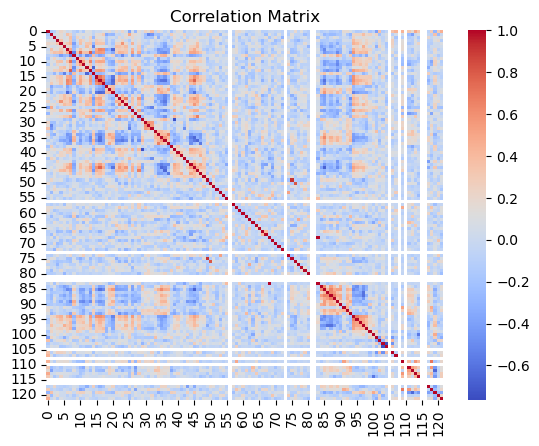

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

# Compute correlation matrix
correlation_matrix = df_imputed.corr(method="pearson")
correlations = np.array(correlation_matrix)

# Visualize the correlation matrix
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Correlation matrix for strong correlations

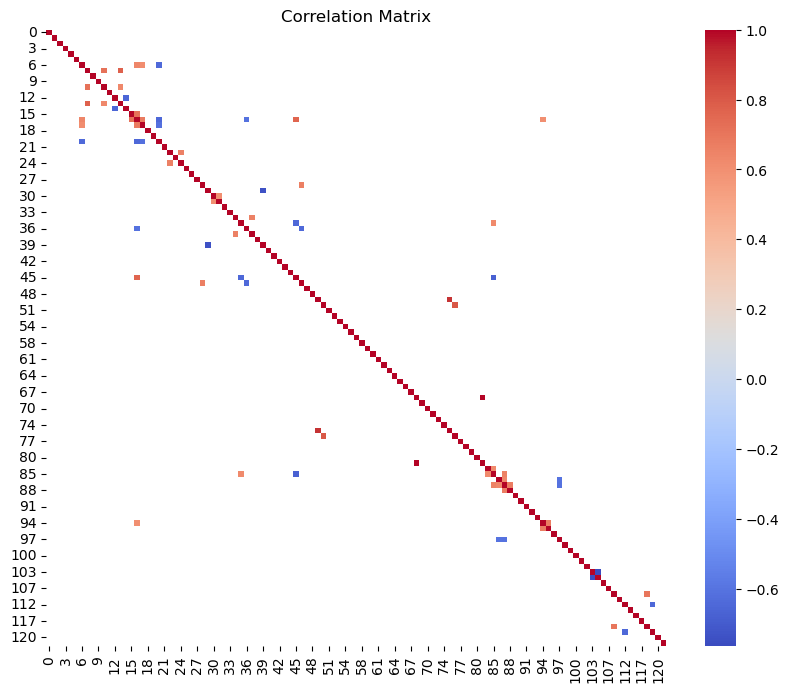

In [30]:
# Set the threshold
threshold = 0.6

# Filter the correlation matrix based on the threshold
strong_correlations = correlation_matrix[abs(correlation_matrix) > threshold]

# replace values below the threshold with NaN
strong_correlations = strong_correlations.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(strong_correlations, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

strong_correlations_array = np.array(strong_correlations)

# Get row and column indices where values meet the condition
row_indices, col_indices = np.where((np.abs(strong_correlations_array) > threshold) & (strong_correlations_array != 1))

coordinates = list(zip(row_indices, col_indices))

# Extract only the values that meet the condition
selected_values = strong_correlations_array[row_indices, col_indices]

### Return a df with strong correlations (above threshold = 0.6)

In [31]:
from scipy.stats import pearsonr

# Create a DataFrame for pairs of strongky correlated items
pairs_df = pd.DataFrame([(selected_values[i], var_list.iloc[int(x), 0], var_list.iloc[int(y), 0]) for i, (x, y) in enumerate(coordinates)],
                        columns=['Selected Values', 'Question 1', 'Question 2'])

# Assuming pairs_df is your DataFrame
# Create a new column with sorted tuples of "Question 1" and "Question 2"
pairs_df['Question_Pair'] = pairs_df.apply(lambda row: tuple(sorted([row['Question 1'], row['Question 2']])), axis=1)


# Drop duplicates based on the new column
pairs_df_no_duplicates = pairs_df.drop_duplicates(subset='Question_Pair', keep='first')

# Drop the temporary column
pairs_df_no_duplicates = pairs_df_no_duplicates.drop(columns=['Question_Pair'])

# Assuming pairs_df_no_duplicates is your DataFrame
# Create a new column to store p-values
pairs_df_no_duplicates['p-value'] = None

# Iterate through each row in pairs_df_no_duplicates
for index, row in pairs_df_no_duplicates.iterrows():
    # Extract the corresponding columns from df_imputed
    data_col1 = df_copy_imputed[row['Question 1']]
    data_col2 = df_copy_imputed[row['Question 2']]
    
    # Calculate correlation coefficient (r) and p-value
    correlation_coefficient, p_value = pearsonr(data_col1, data_col2)
    
    # Update the P-Value column in pairs_df_no_duplicates
    pairs_df_no_duplicates.at[index, 'p-value'] = p_value

pairs_df_no_duplicates.insert(1, 'p-value', pairs_df_no_duplicates.pop('p-value'))

pairs_df_no_duplicates.to_excel('strong_correlations.xlsx', index=False)

C:\Users\admin\miniconda3\envs\pita_paper\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


### Correlation matrix for strong correlations/above threshold

# Grouping

## Fuctions
For easier debuging, we implement our own versions of pca and k-means.

### PCA

In [42]:
import matplotlib.pyplot as plt
def plot_explained_variance(expl_vars, title='Absorbance data', labels=("",)):
    '''Thanks @Marta :)'''
    try:
        expl_vars[0][0]
    except IndexError as e:
        expl_vars=(expl_vars,)
    n_components=len(expl_vars[0])
    pc_array = np.linspace(1,n_components,n_components)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
        fig.set_tight_layout(True)
        
        for expl_var, label in zip(expl_vars, labels):
            ax.plot(pc_array, expl_var,'-o', label=f"{label} Explained Variance %")
            ax.plot(pc_array, np.cumsum(expl_var),'-o', label = f'{label} Cumulative variance %')
            ax.set_xlabel("PC number")
            ax.set_title(title)

        plt.legend()
        plt.show()


def pca_np(data, plot=False, return_vals=False):
    '''PCA implemented with numpy for transparency reasons. Plot param for figure title or None for no figure'''
    covariance_matrix = np.cov(data, ddof = 1, rowvar = False)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    #numpy puts the eigenvectors in the columns???!!! (wtf)
    eigenvectors=eigenvectors.T
    
    sorting=sorted(np.arange(len(eigenvalues)), key=lambda i: eigenvalues[i], reverse=True)
    if plot:
        plot_explained_variance(eigenvalues[sorting]/np.sum(eigenvalues), title=plot)

    if return_vals:
        return eigenvectors[sorting], eigenvalues[sorting]
    else:
        return eigenvectors[sorting]

Here the differences between the numpy implementation and the sklearn implementation wrt explained variance of individual PCs is depicted. When there are less samples than dimensions, sklearn performs some approximation of the eigenvectors. Since the details are unclear, we rather calculate the covariance of the transposed matrix (i.e. covariance of participants rather than answers).

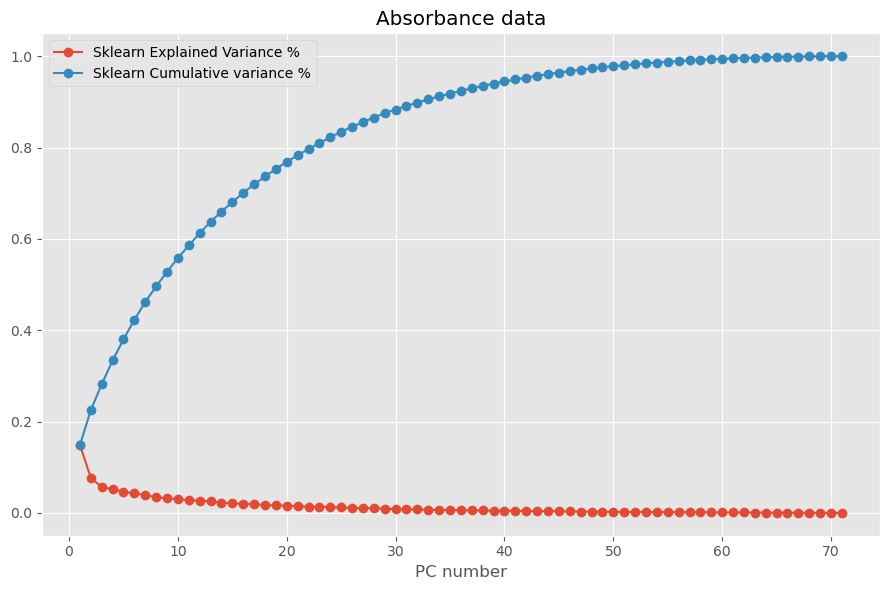

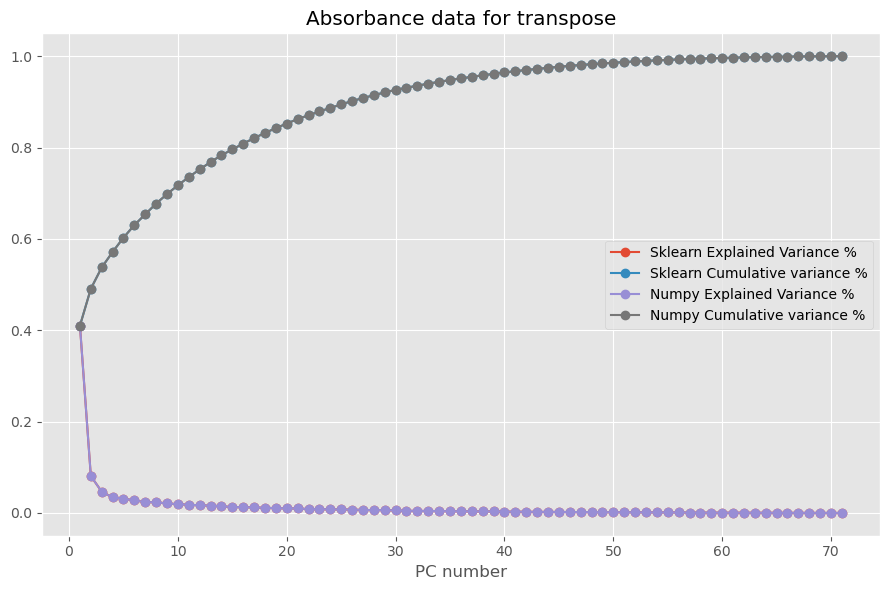

True


In [47]:
from sklearn.decomposition import PCA
# We want to use the socio-demographic information for analyzing the emerging groups later
not_social_data=df_imputed[df_imputed.columns.difference(keys)]


pca = PCA()
principalComponents = pca.fit(not_social_data)

expl_var = principalComponents.explained_variance_ratio_
plot_explained_variance(expl_var, labels=('Sklearn',))


pca = PCA()
result = pca.fit(not_social_data.T)
expl_var = result.explained_variance_ratio_
components, eigenvalues=pca_np(not_social_data.T, return_vals=True)
plot_explained_variance((expl_var, eigenvalues/np.sum(eigenvalues)), title="Absorbance data for transpose",labels=('Sklearn', "Numpy"))

#both implementations give equivalent results
print(np.allclose(np.abs(components),np.abs(result.components_)))

### k-means

In [48]:
import matplotlib.pyplot as plt

#just euclidean distance
dist = lambda point, centers: np.sum((point-centers)**2, axis=-1)

def kmeans(data, k, seed=1, v=False):
    if seed:
        np.random.seed(seed)
    mask_cause_even_numpy_can_be_biatch=np.random.choice(np.arange(len(data)), size=k, replace=False)
    if not (type(data) is np.ndarray):
        data=data.to_numpy()
    centroids=data[mask_cause_even_numpy_can_be_biatch,:]
    #else:
    #    centroids=data.iloc[mask_cause_even_numpy_can_be_biatch,:].to_numpy()
    #print(mask_cause_even_numpy_can_be_biatch)
    old=np.zeros(len(data))
    new=np.ones(len(data), dtype="int")
    t=0
    log=[]
    
    while not (old==new).all():#stopping too early? Better would be centroid not changing? (no, both should be equivalent)
        old=new.copy()
        t+=1
        # no idea if the iteration over points can be vectorized somehow...
        for i in range(len(data)):
            distances=dist(data[i,:], centroids)#why is pandas so weird????
            new[i]=np.argmin(distances)
            '''if i in (len(data)-11, len(data)-12):
                print("dists",distances)'''
        for i in range(k):
            centroids[i]=np.mean(data[new==i])

        if t<3 and v:#not t%1:
            print(f"{t}:\n{old}\n{new}\n")
            print(distances,"\n")
            for label in range(k):
                if len(data[new==label]):
                    plt.scatter(data[new==label][:,0], data[new==label][:,1], label=label)
                else:
                    #print(data[new==k])
                    #print(len(data[new==k]))
                    pass
            plt.show()
        log.append(new.copy())
        
    return log, new

def plot_clusters(data, labels, dims=(0,1), ax=None, title=None):
    if type(data) is pd.core.frame.DataFrame:
        data=data.to_numpy()
    for label in range(max(labels)+1):
        if len(data[labels==label]):
            if not ax:
                plt.scatter(data[labels==label][:,dims[0]], data[labels==label][:,dims[1]], label=label, alpha=0.8)
            else:
                ax.scatter(data[labels==label][:,dims[0]], data[labels==label][:,dims[1]], label=label, alpha=0.8)
        else:
            pass
    if title:
        plt.title(title)
    if not ax:
        plt.xlabel(f"Dimension {dims[0]}")
        plt.ylabel(f"Dimension {dims[1]}")
        plt.legend()
        plt.show()

    else:
        ax.legend

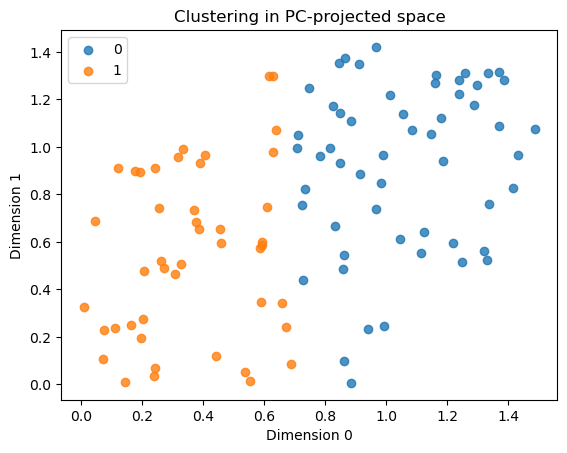

In [49]:
# We use artificial data for this showcase, so that the clusters make sense in a 2D projection
data=np.random.random((100,2))
data[:50,:]+=0.5

components=pca_np(data)
pca_transformed_data = data @ components

log, labels=kmeans(data, 2, 1)
log_, labels_=kmeans(pca_transformed_data, 2, 1)

plot_clusters(data,labels_, title="Clustering in PC-projected space")

## Inspect Data in PC-projections

As a rule of thumb doing dimension reduction with PCA keeps long distance relations and kinda forgets short distance relations. If we project into the whole PC space however (i.e. no dimension reduction), all pairwise distances stay the same. This is not reflected in the results of the implementation. It rather seems, that large distance relationships do play a larger role in PC space (clustering in pc space only cares about the point that in the space of the first two PCs is a huge outlier), even without dimension reduction.

The example uses k-means and afaik k-means should perfectly reproduce the results from the not-transformed dataset, since it only bothers about initialization and pair-wise differences (and since the centroids are the mean value under euclidean distances, that should hold for them as well). My explanation for that is some numerical instability during eigenvalue decomposition, such that small values become meaningless. This could probably also account for the observed preference of long distance relationships.

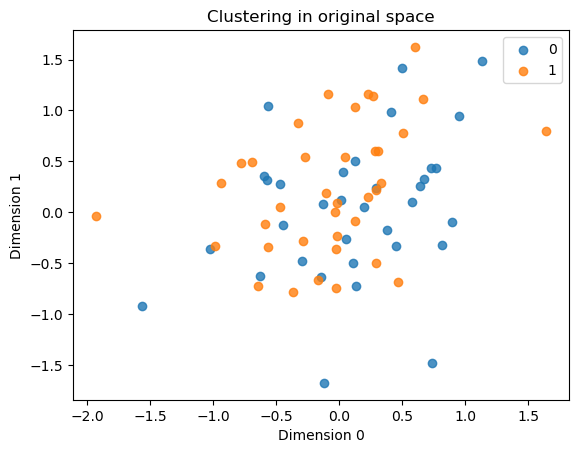

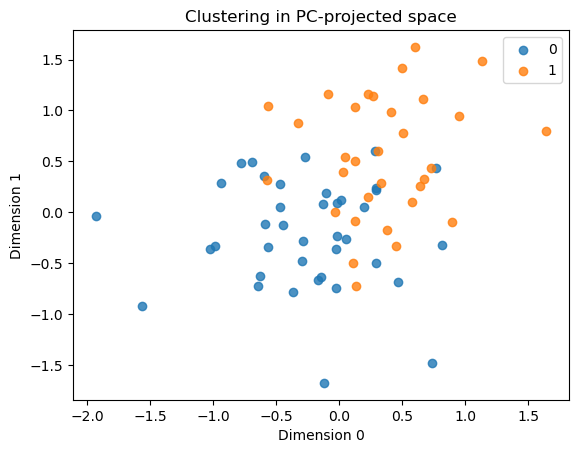

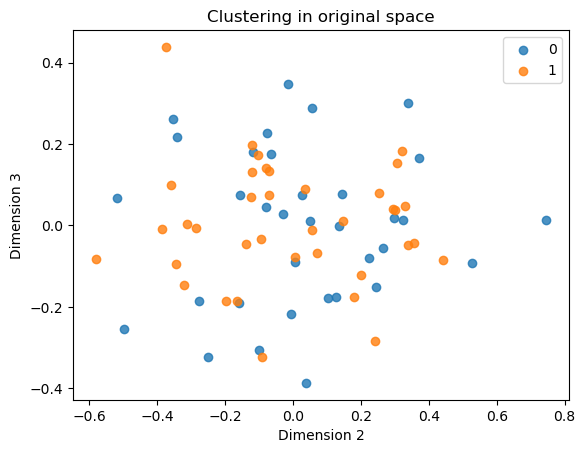

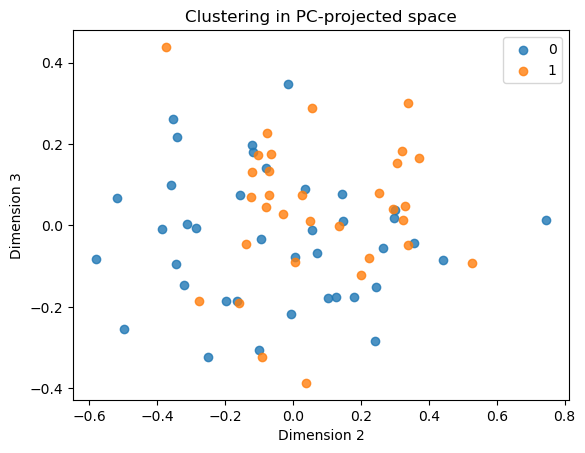

In [53]:
# this cell shows usage of PCA and exemplifies that there is some non-deterministic shenanigans

# We want to use the socio-demographic information for analyzing the emerging groups later
not_social_data=df_imputed[df_imputed.columns.difference(keys)]
components=pca_np(not_social_data.T)

pca_transformed_data = components.T @ not_social_data

log, labels=kmeans(not_social_data, 2, 1)

log_, labels_=kmeans(pca_transformed_data, 2, 1)

# We do the plotting in PC-space, so that not tons of points are on top of each other
plot_clusters(pca_transformed_data,labels, title="Clustering in original space")
plot_clusters(pca_transformed_data,labels_, title="Clustering in PC-projected space")

plot_clusters(pca_transformed_data,labels, dims=(2,3), title="Clustering in original space")
plot_clusters(pca_transformed_data,labels_, dims=(2,3), title="Clustering in PC-projected space")

## Which questions are relevant for the Components?
Questions that have interesting covariances with other questions should be relevant (i.e. have a high magnitude value) in early PCs. The questions that are relevant in later PCs, only, do not contribute to interesting data structures and their variance can be interpreted as noise with respect to possible underlying structures that we are trying to find. However, since there is a lot of components (and therefore also a high dimensionality of them) this way of inspection can only give vague hints, since it is hard to get a comprehensive overview.

In [54]:
question_list=not_social_data.columns


for i in range(5):
    print(f"PC-{i}\n")
    order=sorted(np.arange(len(components)), key=lambda j: np.abs(components)[i,j], reverse=True)
    print("top 5",*[str(components[i,j])+"\n"+question_list[j] for j in order][:10],"", sep="\n\n")
    print("bottom 5",*[str(components[i,j])+"\n"+question_list[j] for j in order][-10:], "", sep="\n\n")

PC-0

top 5

0.17197674071012964
ActPri[SQ009]. In the hour before the study, I have pursued the following activities  (choose all applicable) [played an instrument]

0.16348915099683245
Activity[SQ005]. Which of these options best describe(s) your professional status? [Full-time job]

0.15685609700881414
ActPri[SQ016]. In the hour before the study, I have pursued the following activities  (choose all applicable) [pursued care work]

0.15430800783573498
LSTestQ5[SQ005]. (If applicable) Here and now, I feel satisfied [with my education.]

0.15277465381577499
PHQ9[SQ009]. Over the last two weeks, how often have you been bothered by any of the following problems? [Moving or speaking so slowly that other people could have noticed.]

0.1525484929615535
SoCQ1N[SQ002]. Choose the tendency best describing your current experience.  Here and now, ... [I have the feeling I don't really care about what is happening around me.]

0.14876237962370156
Activity[SQ003]. Which of these options best descr

## Inspect the different clusterings in PC-projections
For the general approach of clustering in dimension reduced space, we need (at least) two hyperparameters: The amount of dimensions that we want to keep and the amount of classes/clusters we want to find. Potentially, different clustering algorithms can be compared. Todo: The code allows for changing the clustering algorithm in order to explore the results of different clustering algorithms.

However, for most of the time we simply use k-means, the resulting clusters seem visually just as meaningfull (or unmeaningfull) as any others.

The cell below does a grid search over the amount of kept components $n_{PCs} \in {1,2,3}$ and the number of clusters $n_{clusters} \in \{2,3\}$. Results are meant to be evaluated qualitatively by vizually inspecting the emerged clusters in the spaces that result from two dimensional combinations (i.e. pairs) of the first four PCs. Some interpretations can be found below the output.

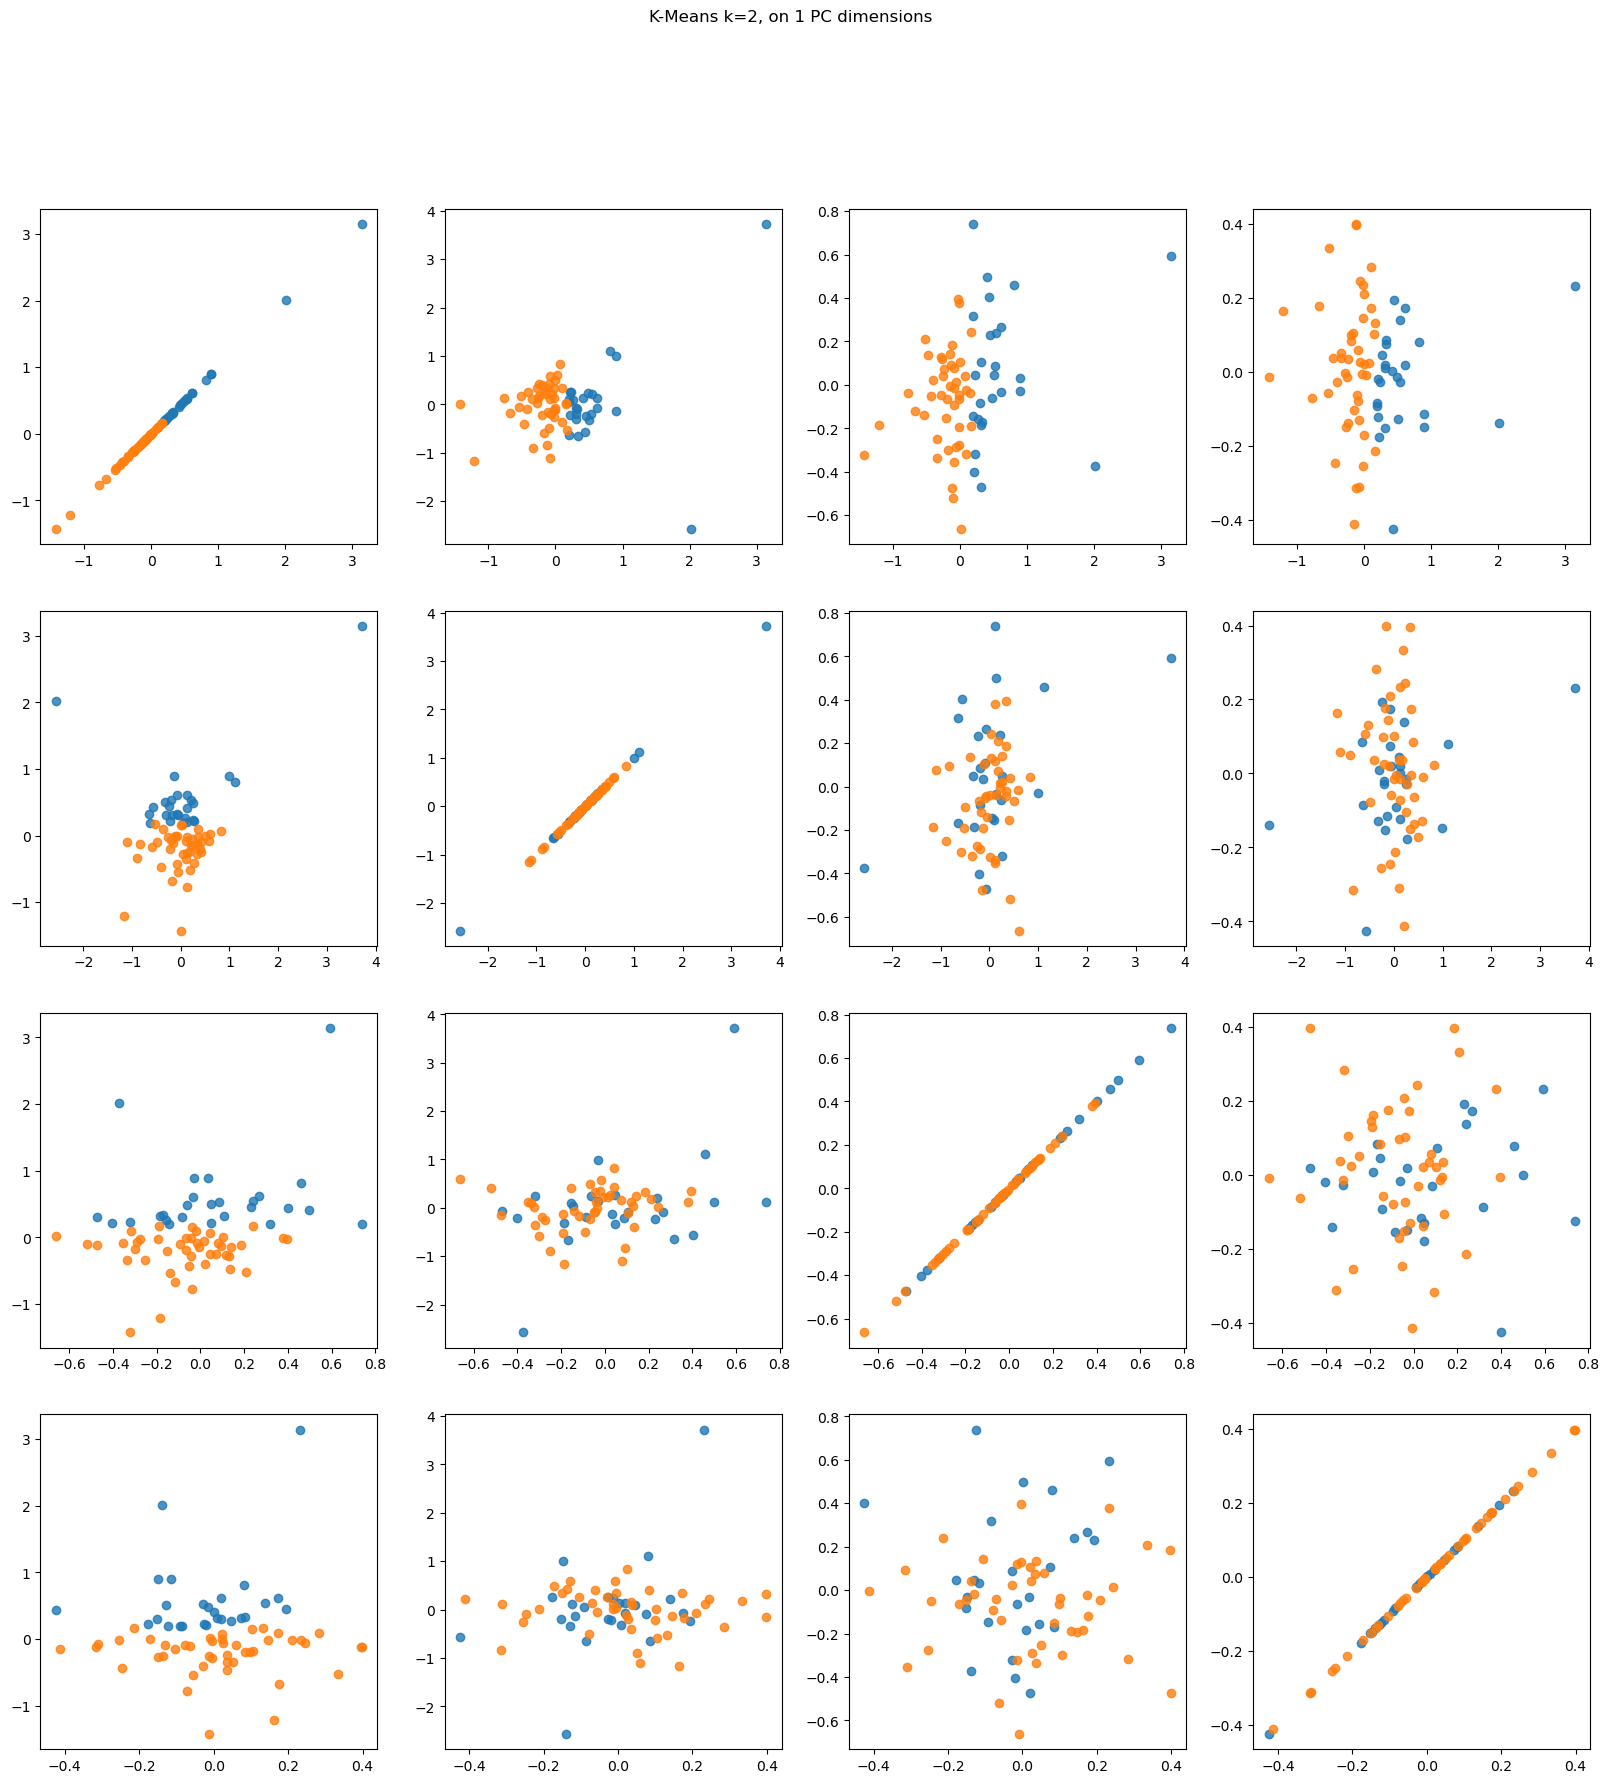

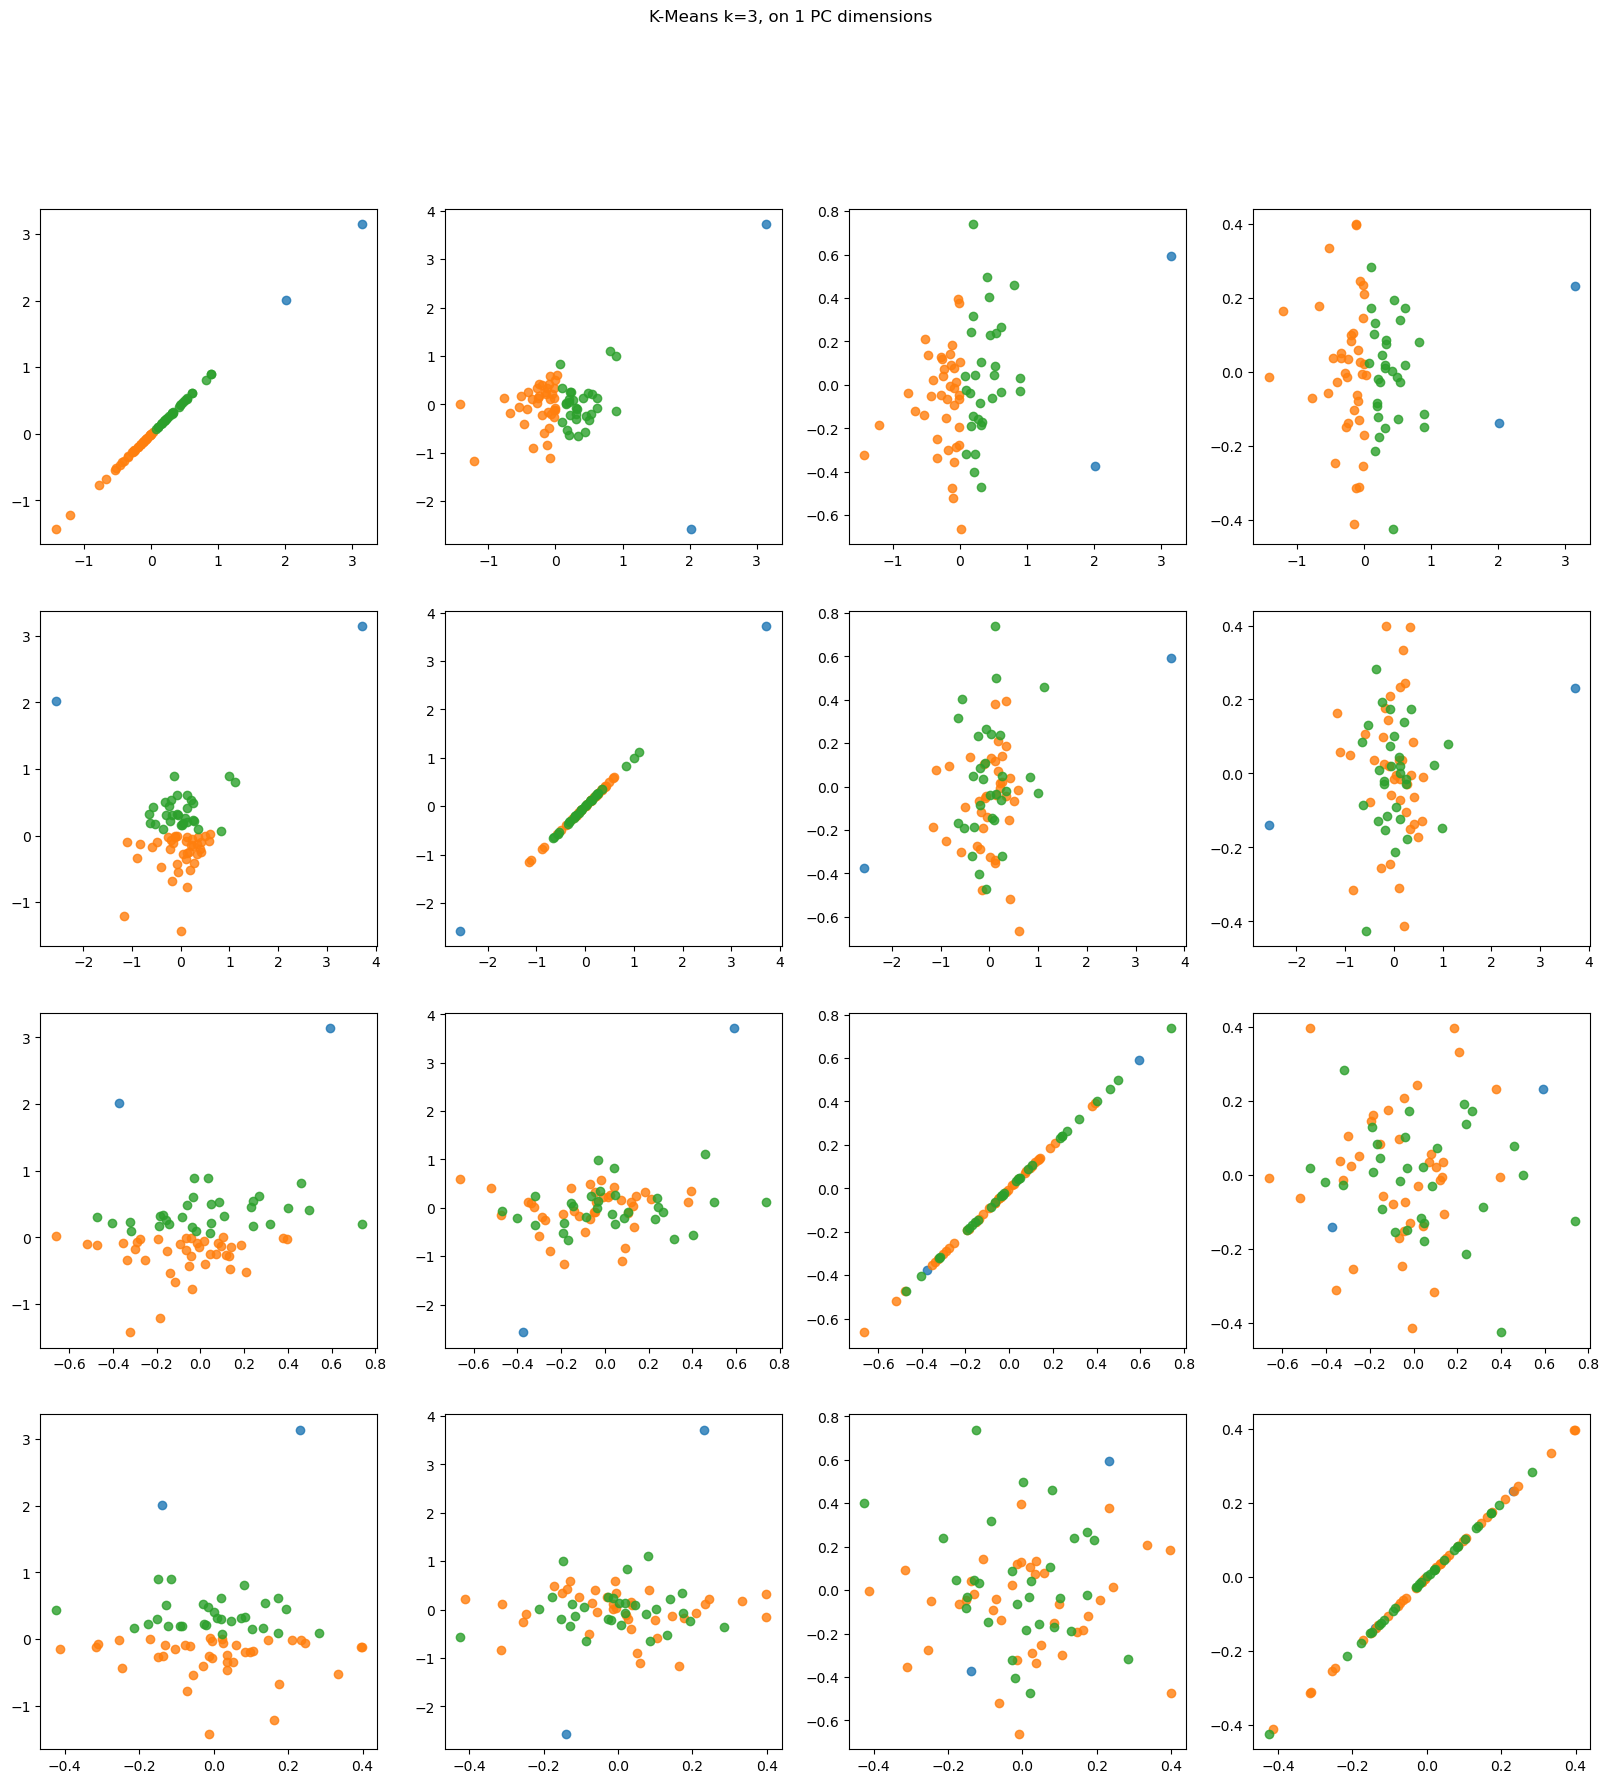

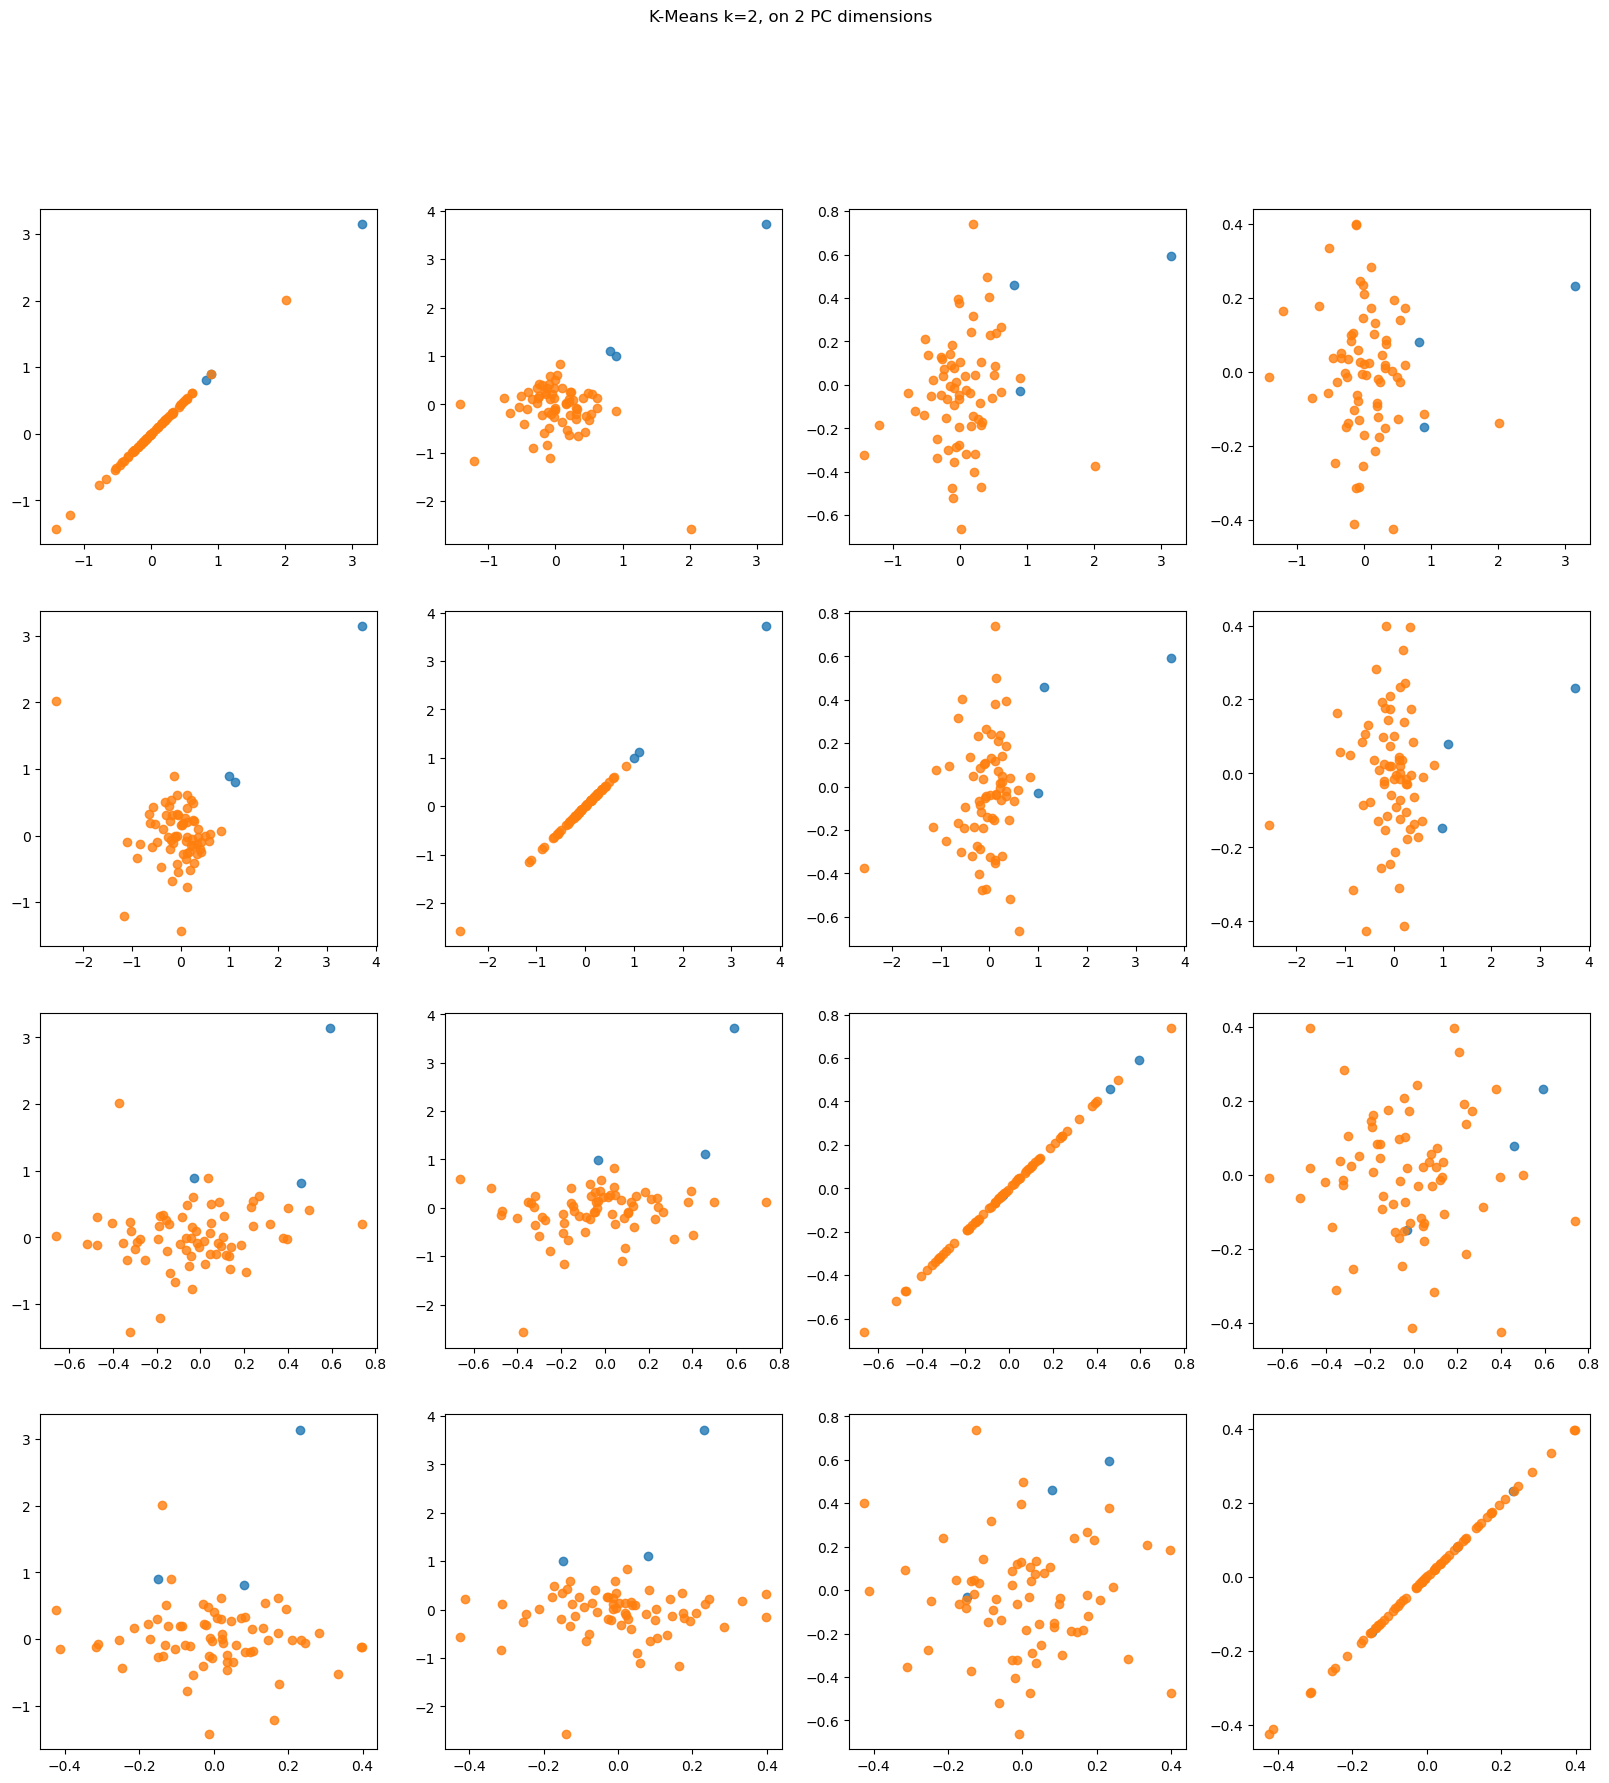

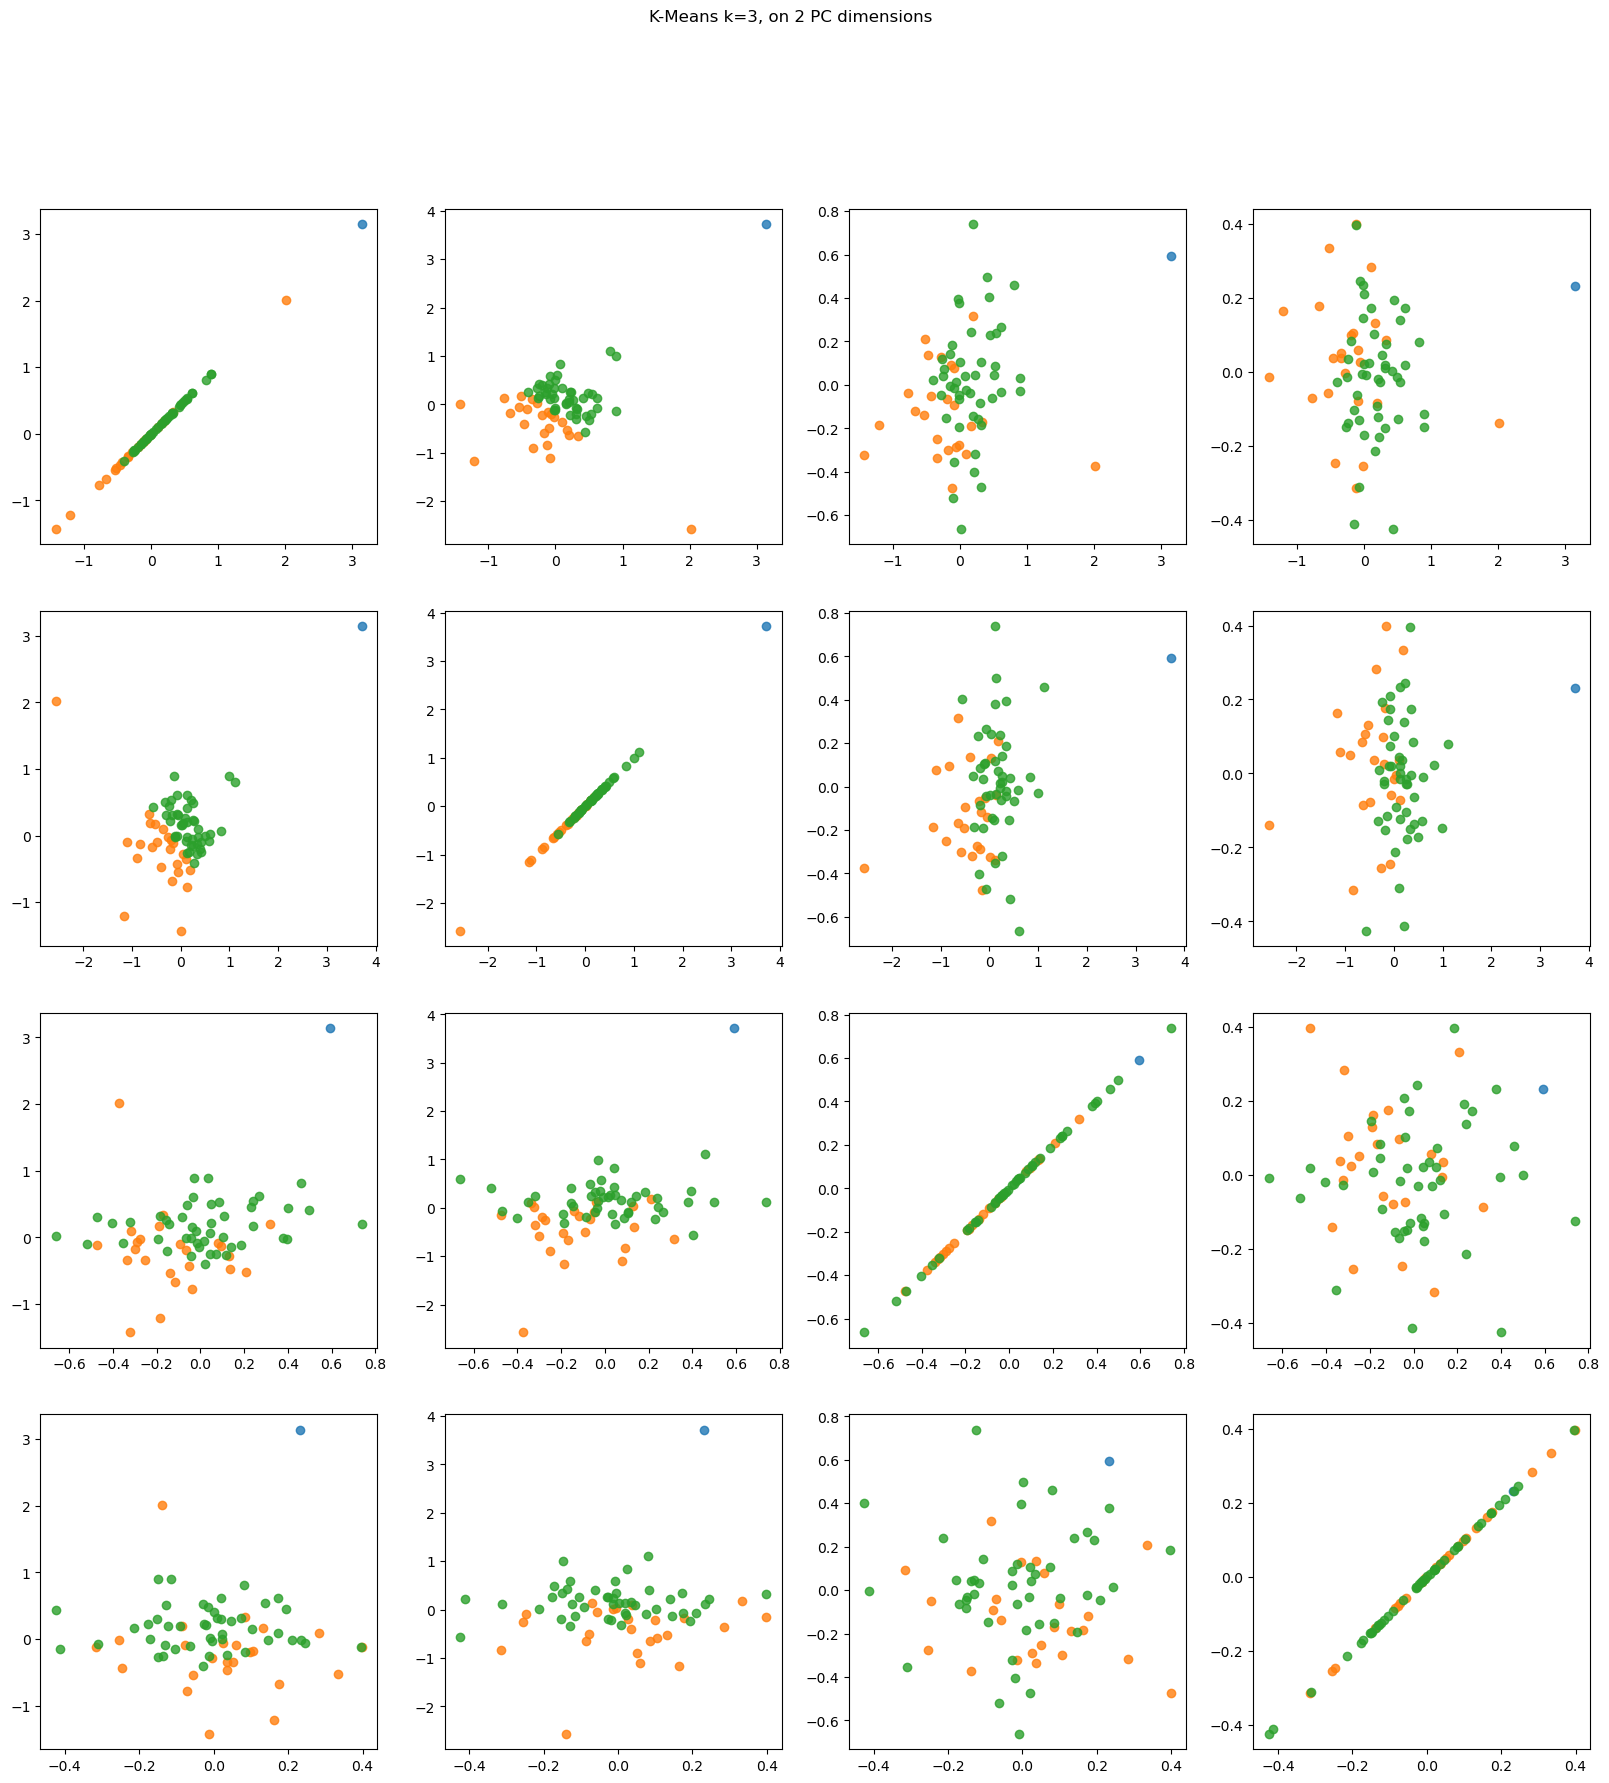

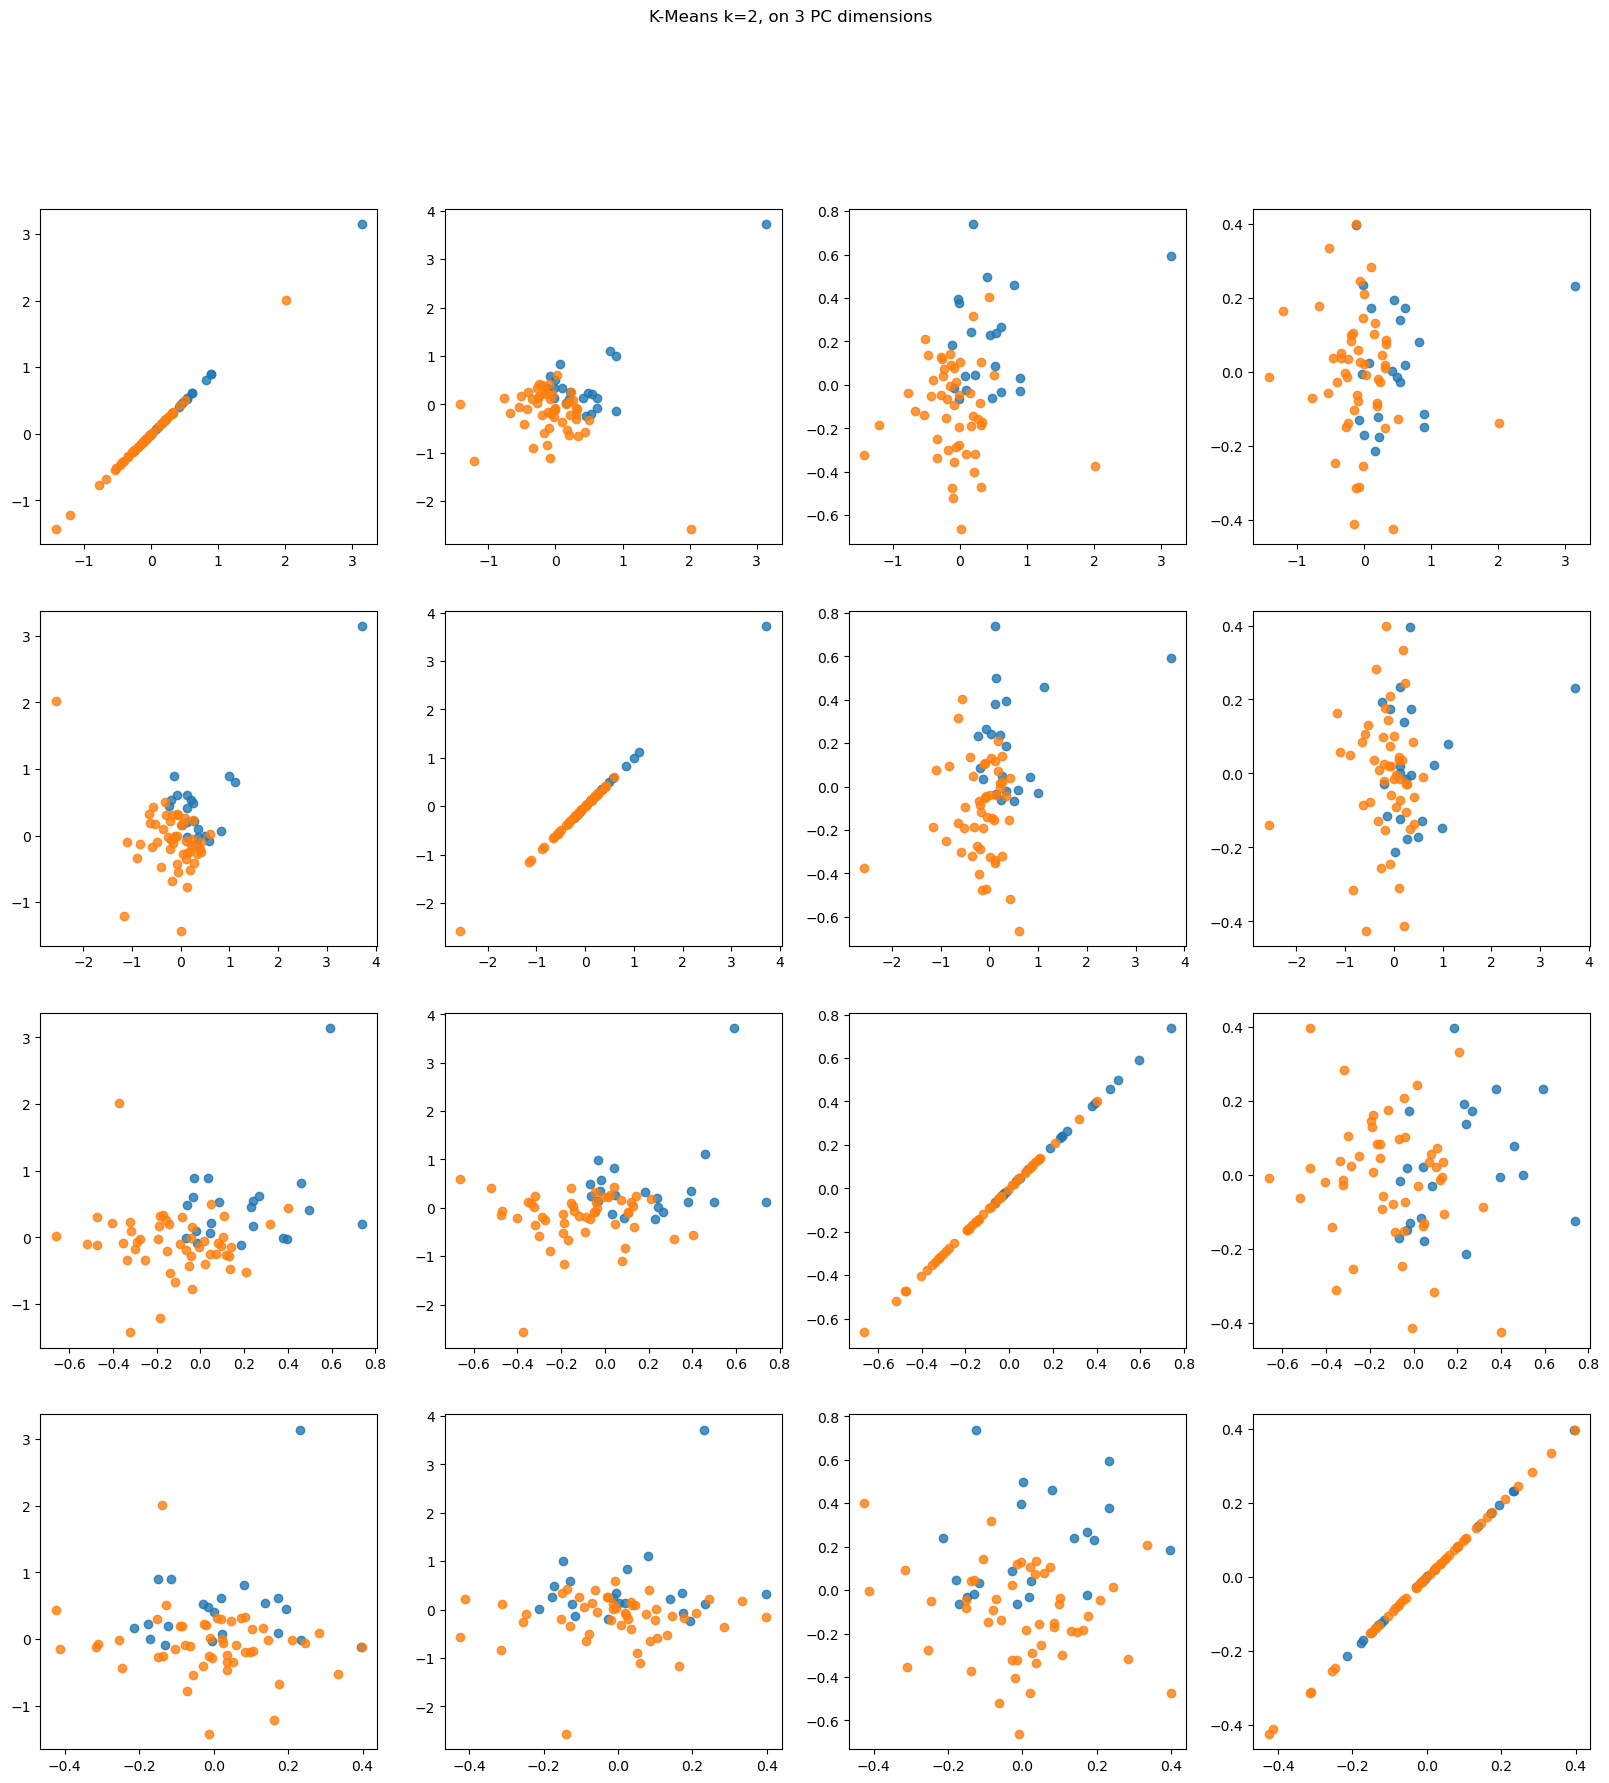

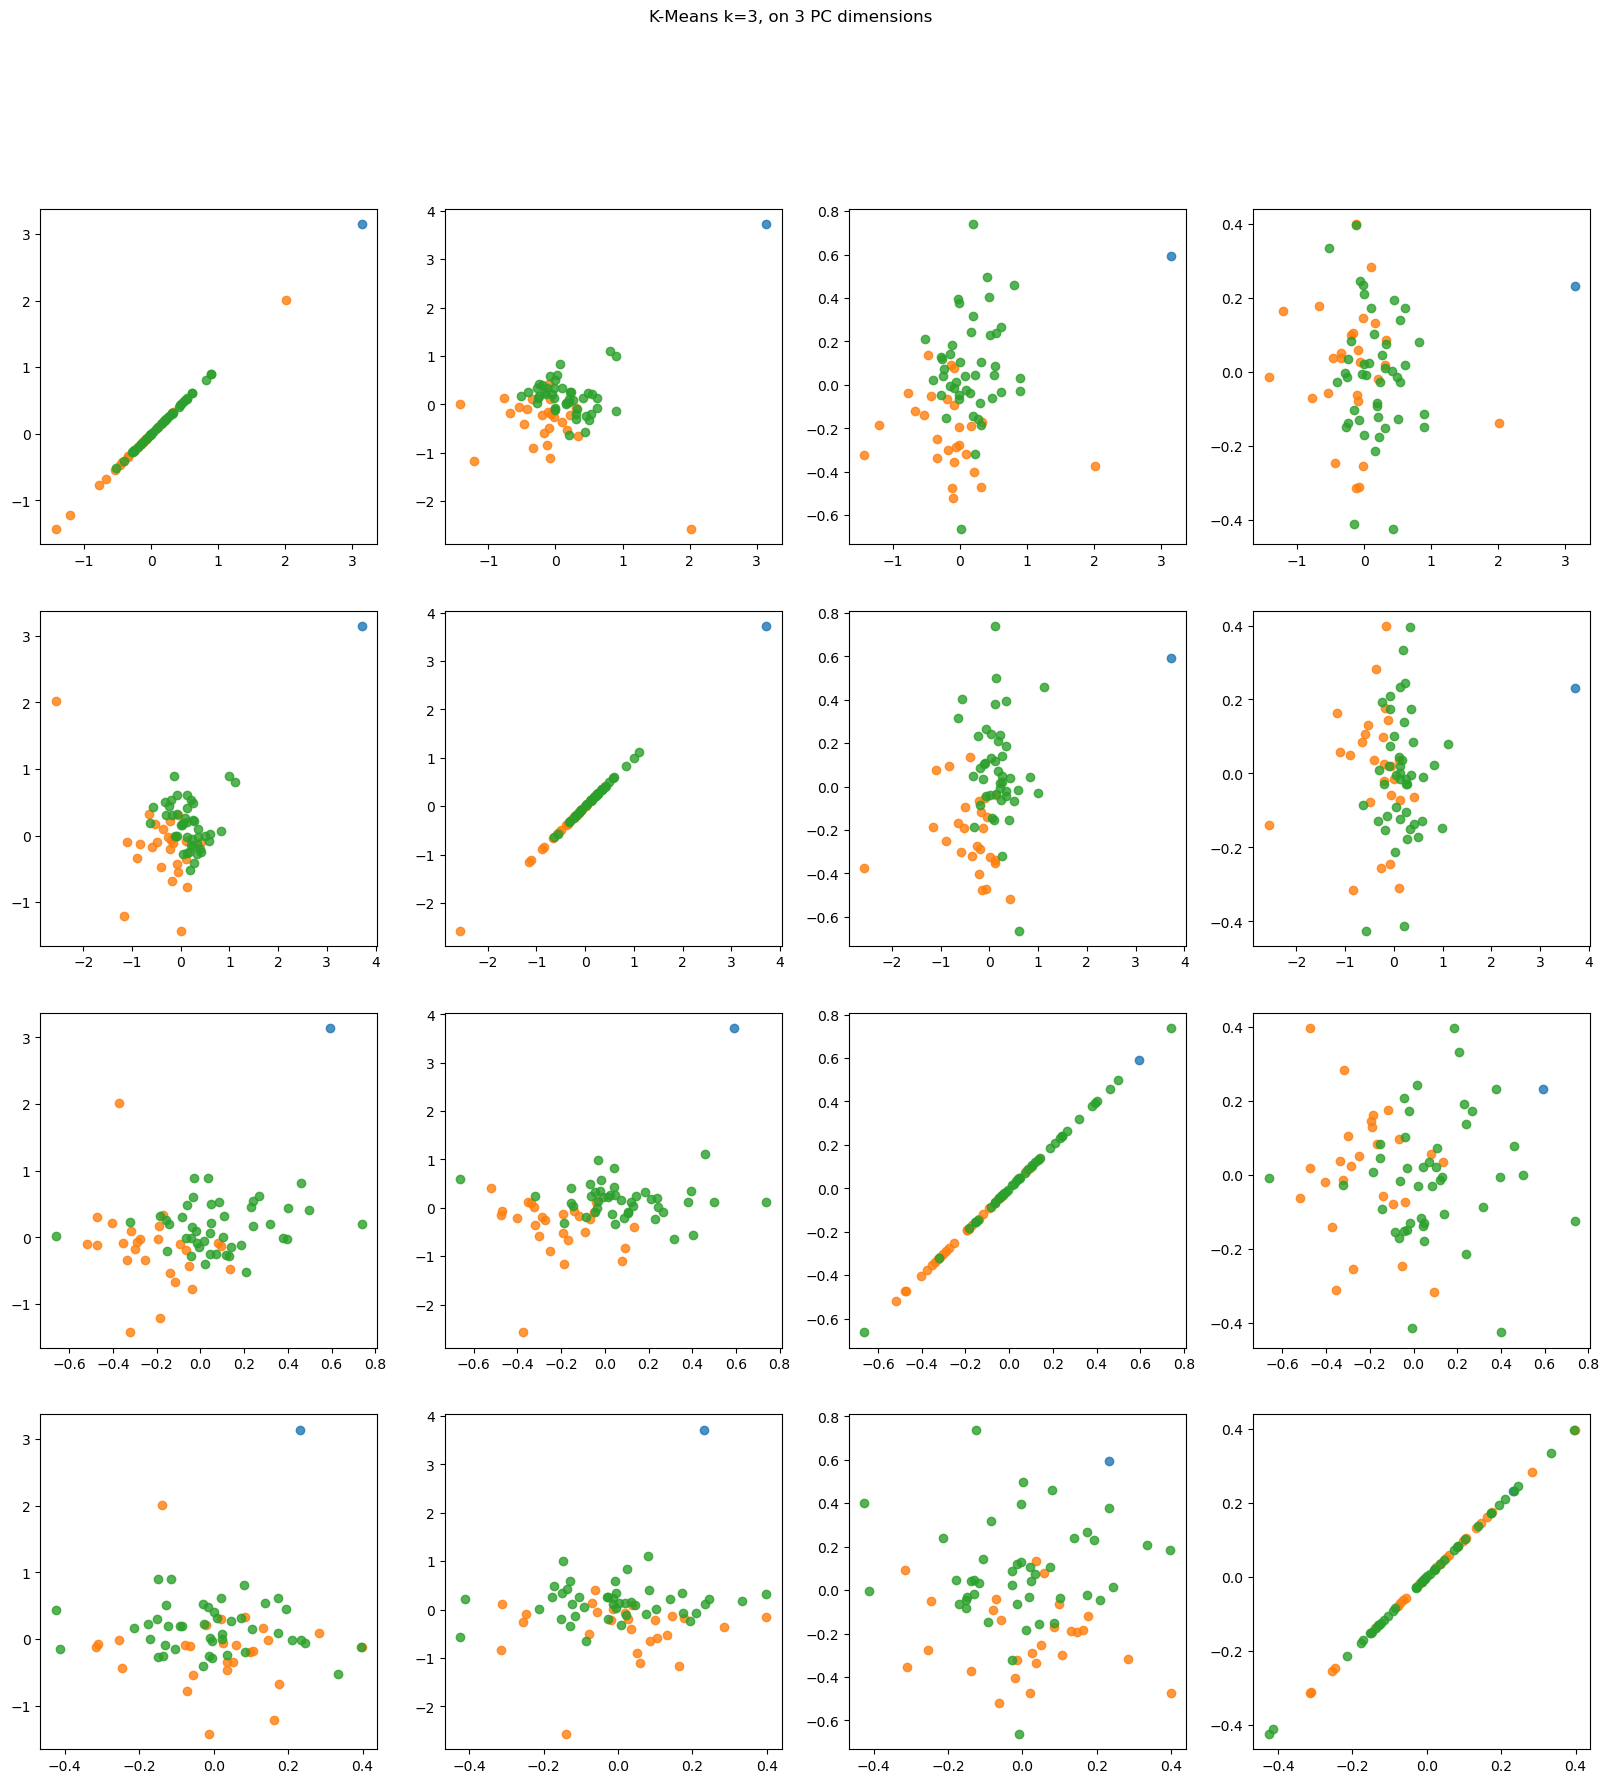

In [27]:
def inspect_clusters(data, n_pcs, n_clusters, vis_pcs=4):
    assert data.shape[0]<data.shape[1], "nah, we assume that we have to transpose, cause it is that way in the actual dataset"
    components=pca_np(data.T)
    
    for dims in n_pcs:
        pca_transformed_data = components.T @ data#pca.fit_transform(df_imputed)

        for k in n_clusters:
            log, labels=kmeans(pca_transformed_data.iloc[:,:dims], k, 1)
            fig, axs = plt.subplots(vis_pcs, vis_pcs, figsize=(20,20))
            
            for i, j in np.ndindex((vis_pcs,vis_pcs)):
                plot_clusters(pca_transformed_data, labels, (i,j), axs[i,j])
            fig.suptitle(f"K-Means k={k}, on {dims} PC dimensions")
            plt.show()

inspect_clusters(not_social_data, (1,2,3), (2,3))



### Interpretation of clusterings
- There are no obious clusters visible. We consider clusterings to "make sense", when the emerging clusters span regions that are spatially close in more dimensions than the ones used for clustering and they do not violate intuitive clusters in the originally used dimensions.
- Since most of the explained variance comes from the first PC, we think that it is feasible to look at clusters that emerge in a projection to this PC, only.
    - For k=2, the resulting clusters seem arbitrary
    - For k=3, the clustering works as an outlier detector
- For k=3 and n_PCs=3 the clusters seem to make sense in the first four PC dimensions. However, one participant gets singled out. We will have a closer look at this setup below
- From the absorbance plot, we know that PCs later than the first two are pretty meaningless. Therefore we resitricted our analysis to no more than the first three PCs.

## Interpretation of Clusters
Now lets finally get to the interesting stuff: did we manage to identify social groups? In order to find out, we compare the histogram of socio-demographic backgrounds between emerged groups, for each question individually.

First, lets see if our detected outliers (0, i.e. blue) entails any interesting information. As it seems the two participants in question share no socio-demographic background, except for both being on the rather young end of the age scale.

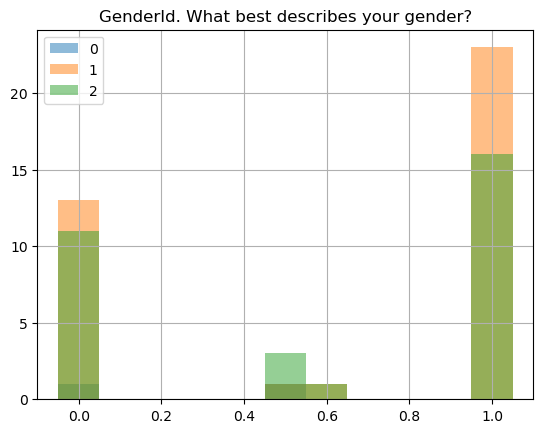

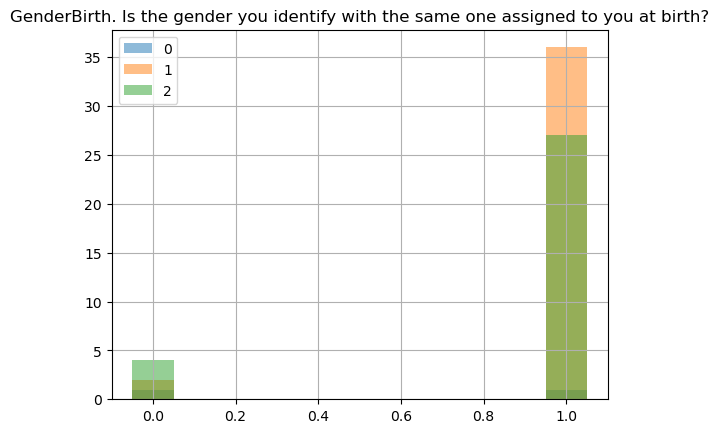

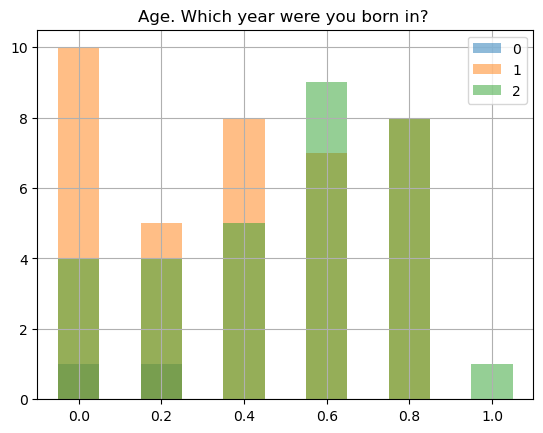

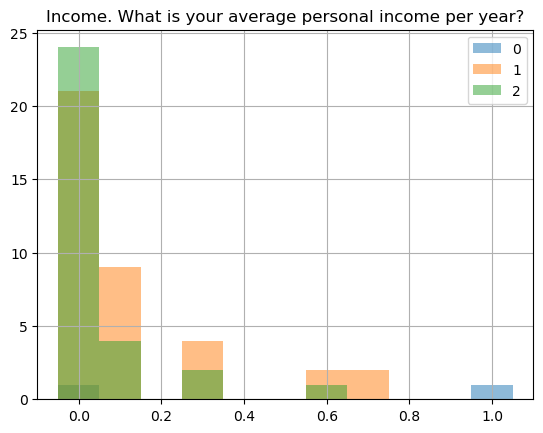

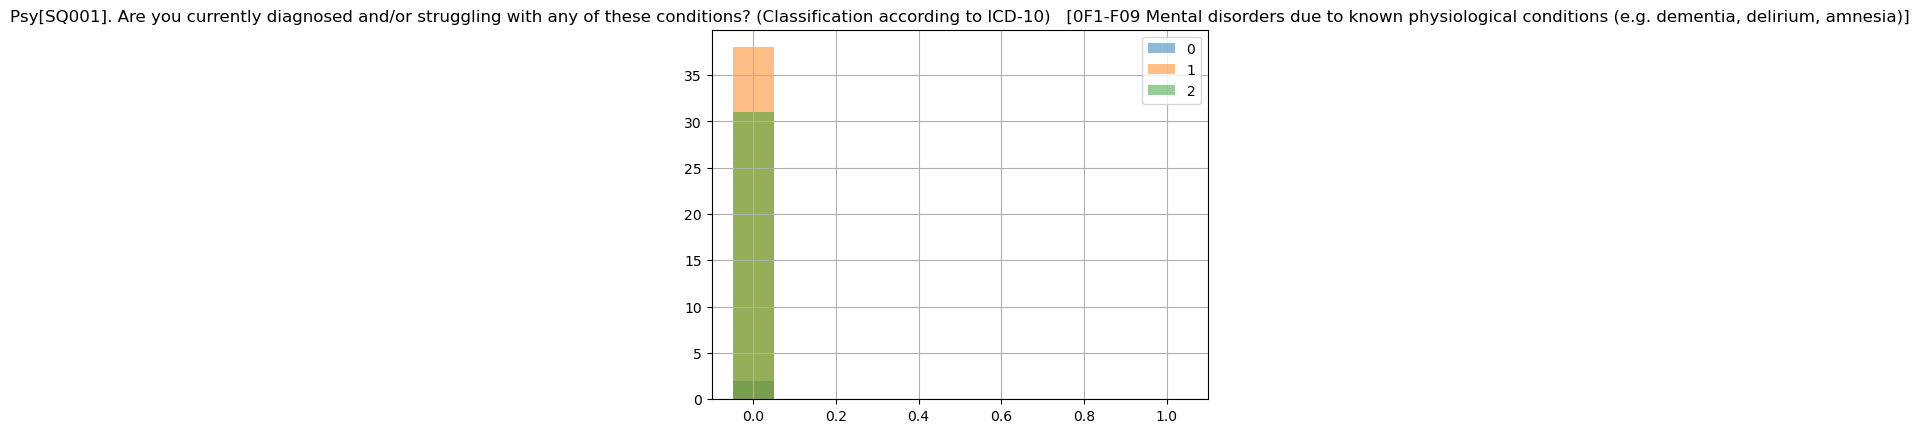

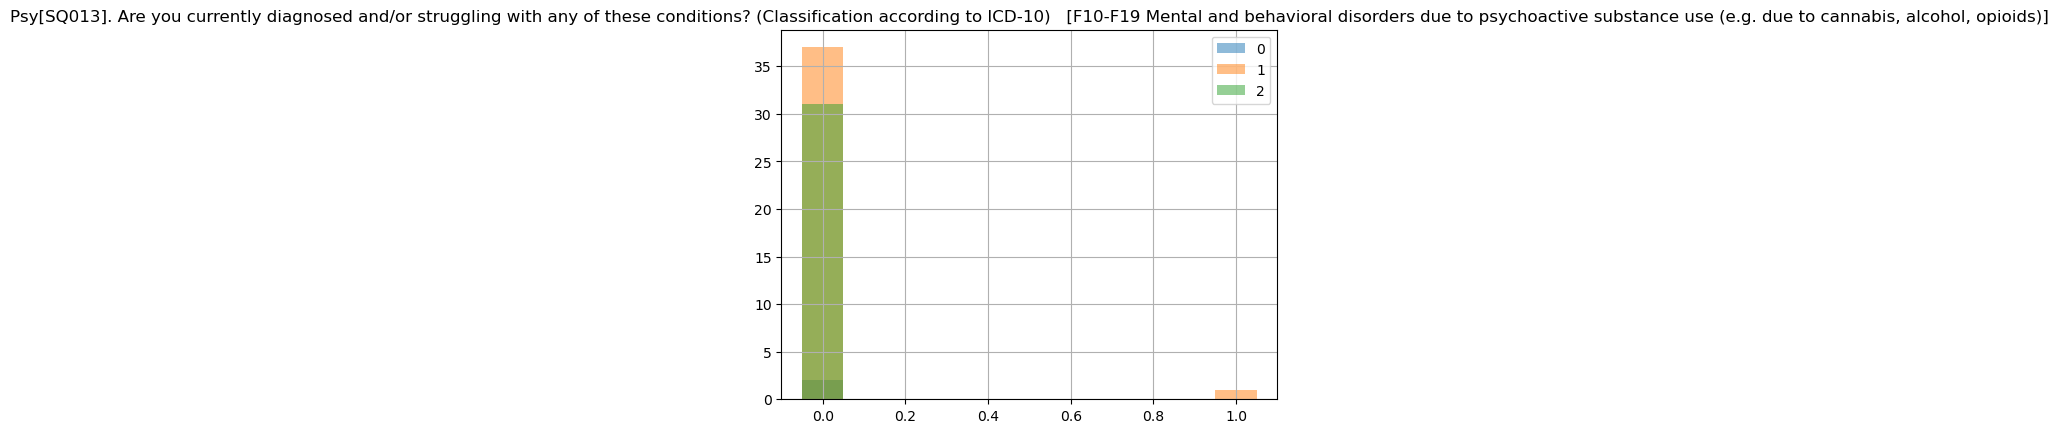

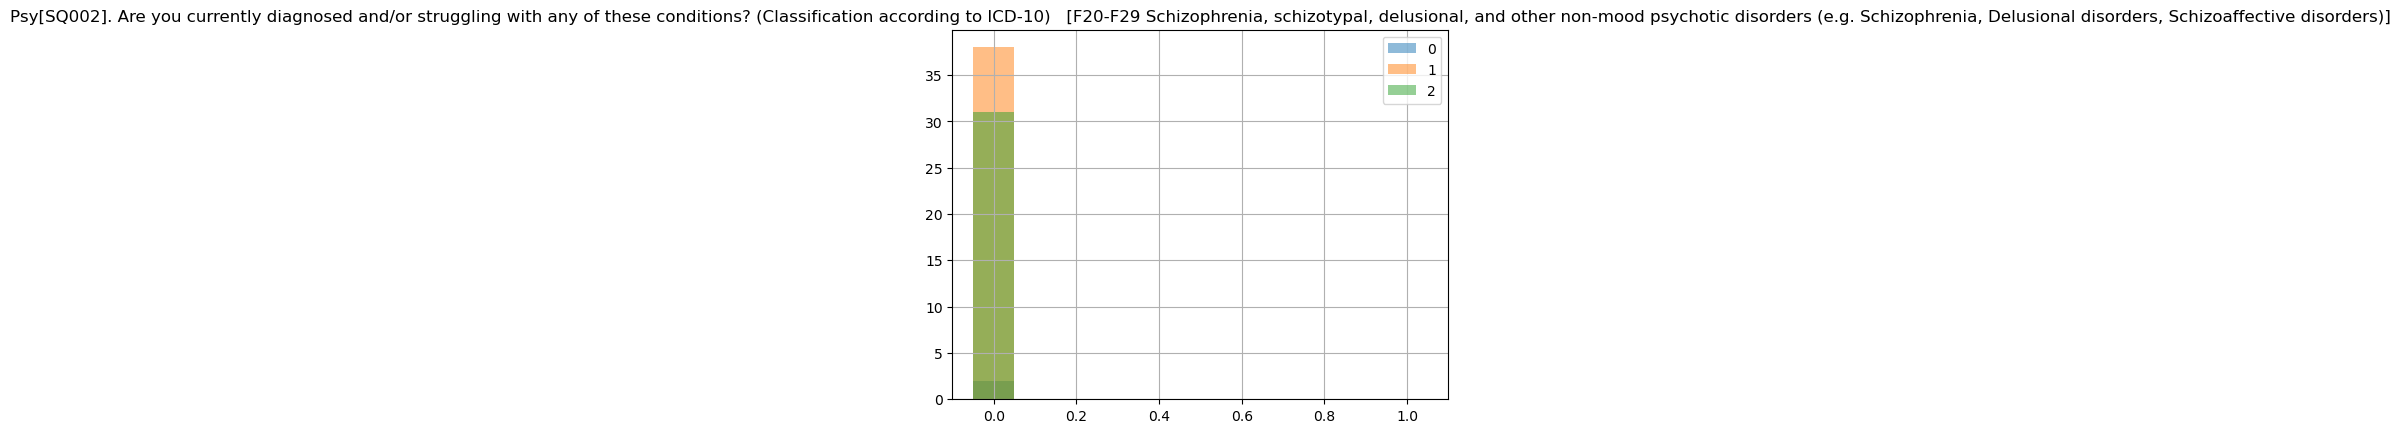

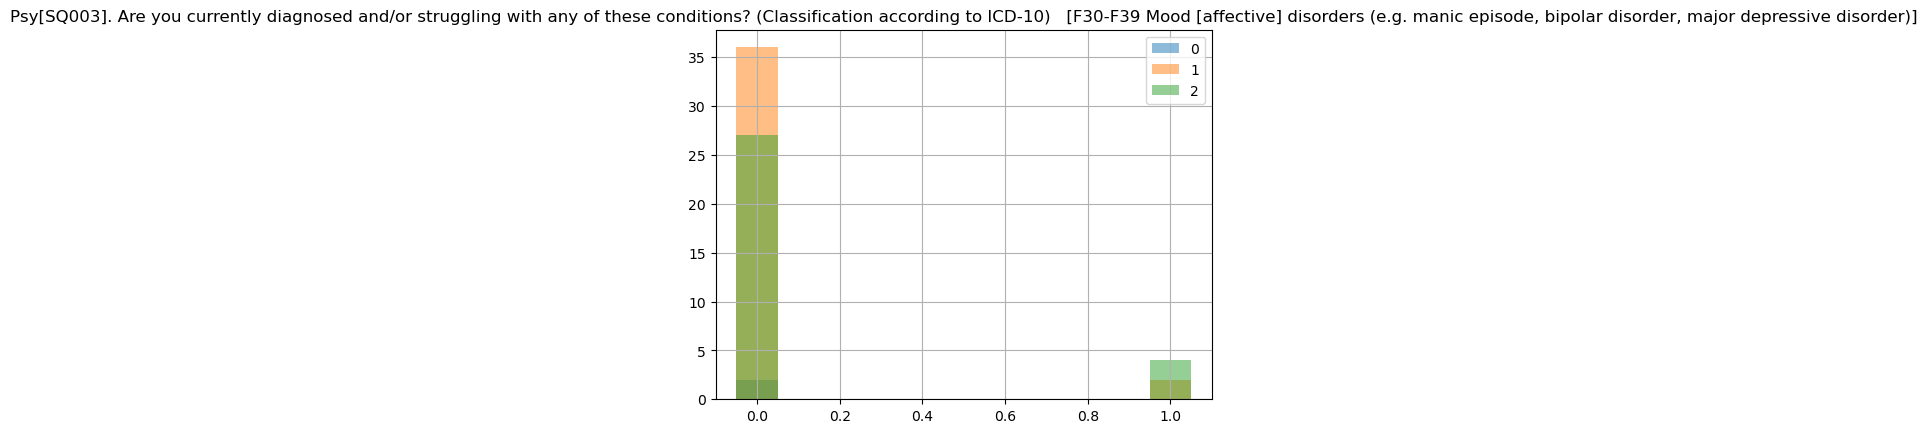

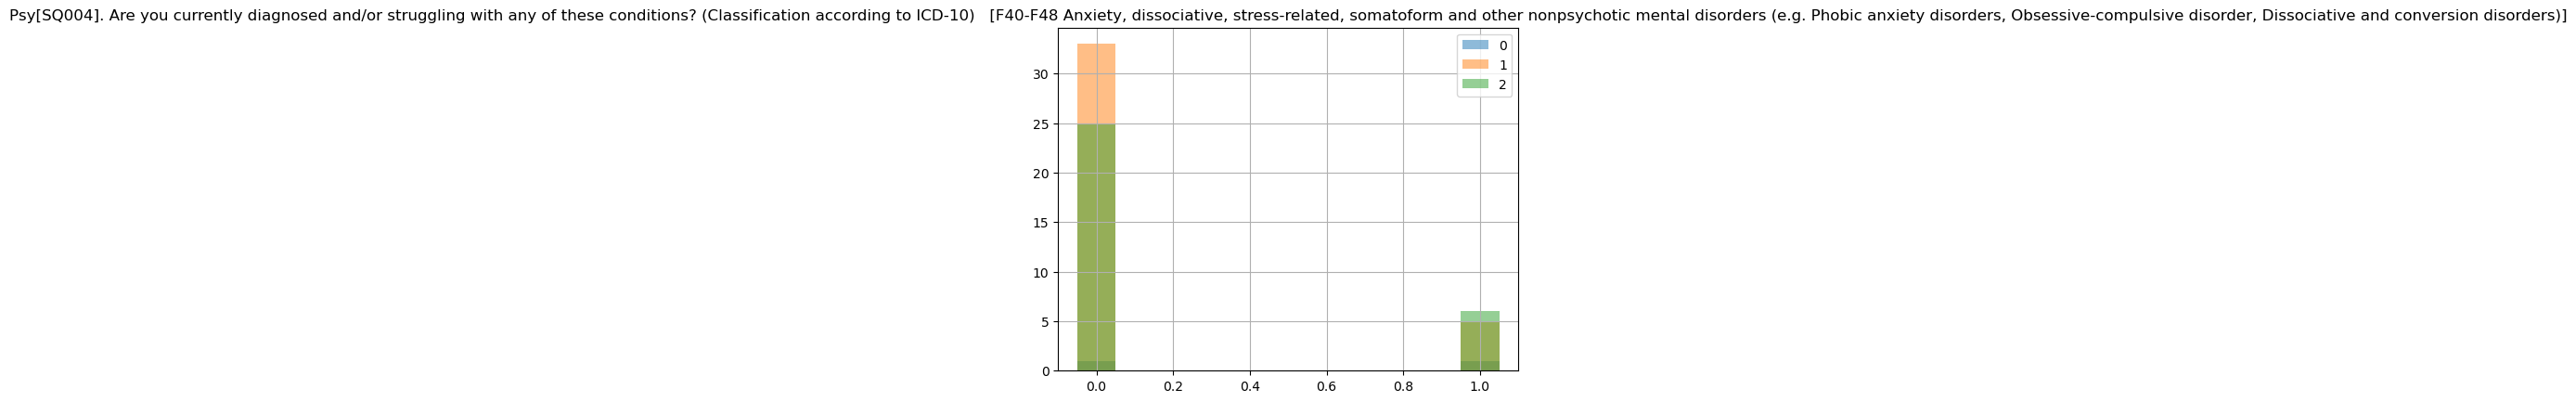

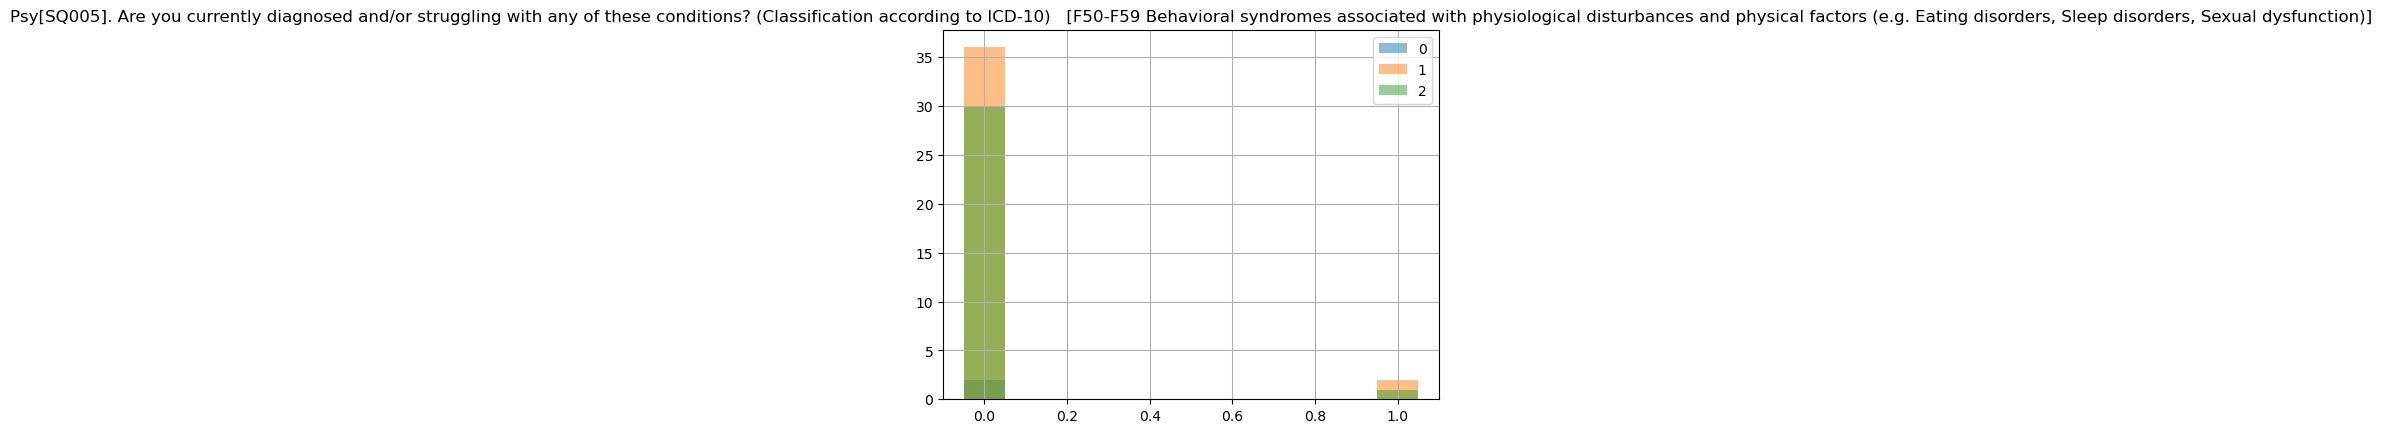

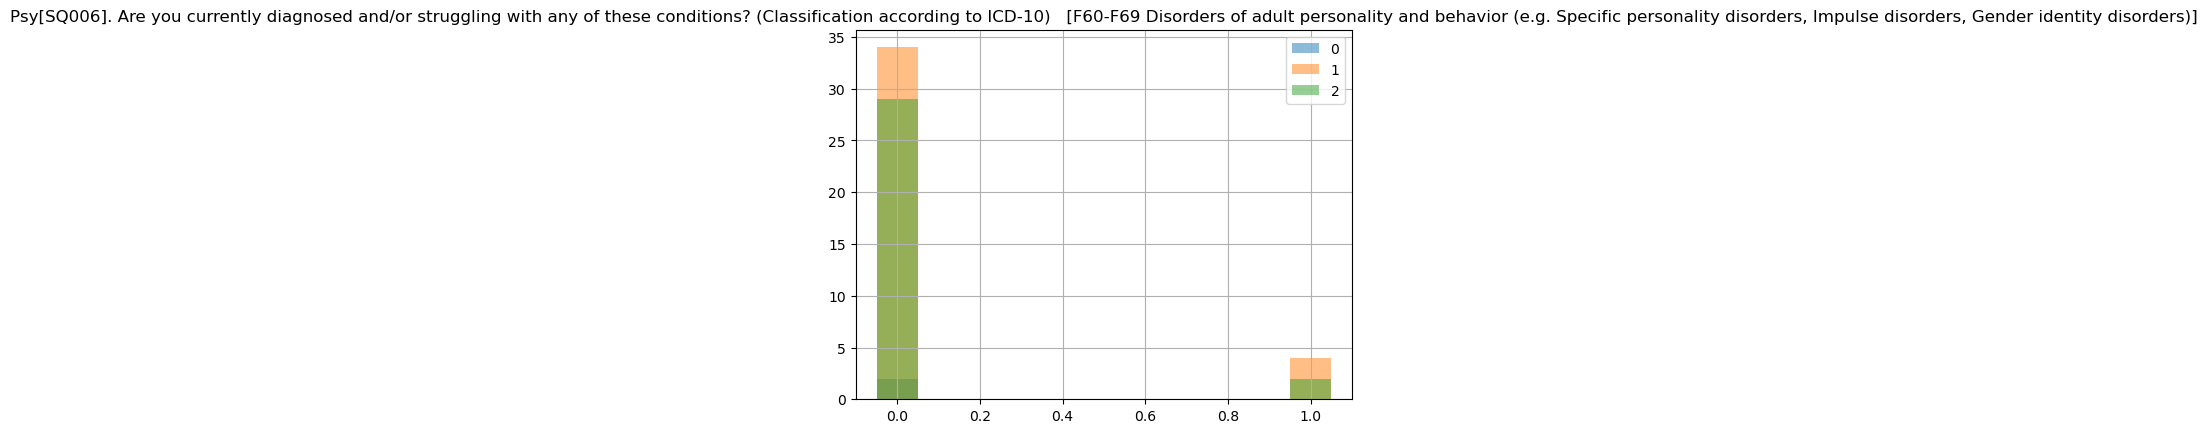

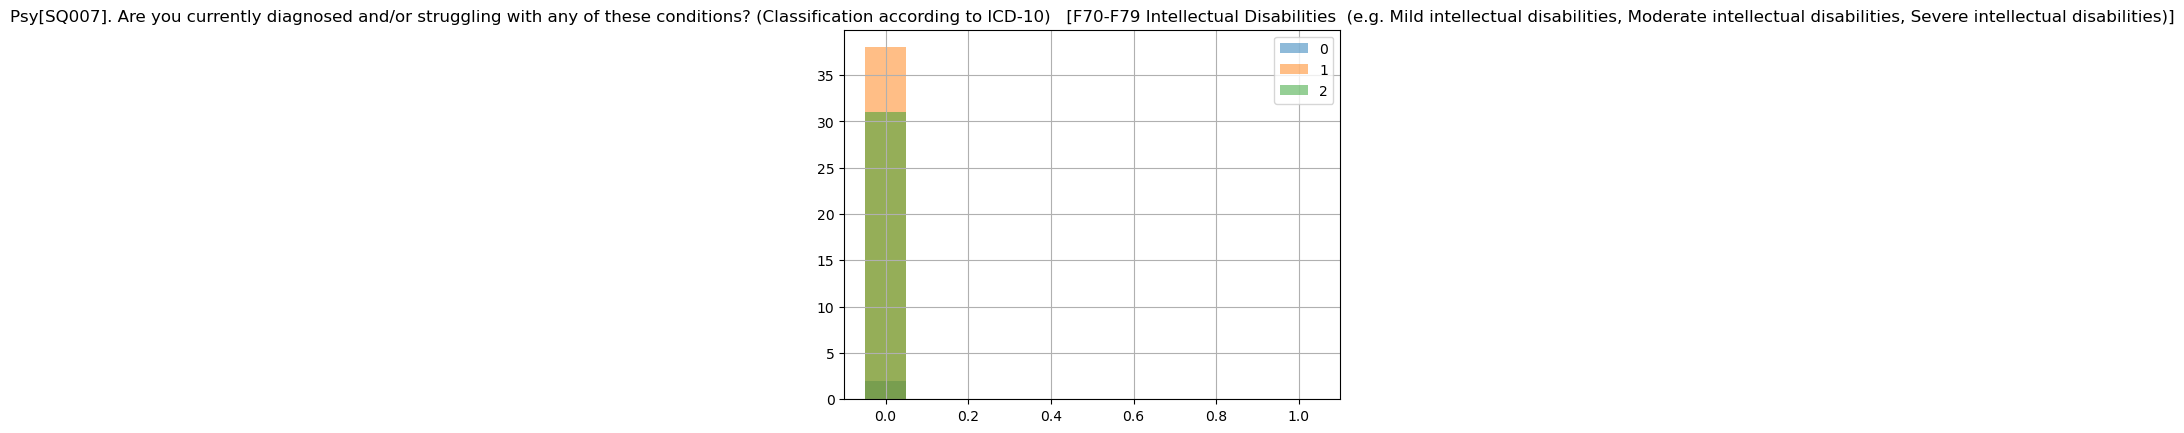

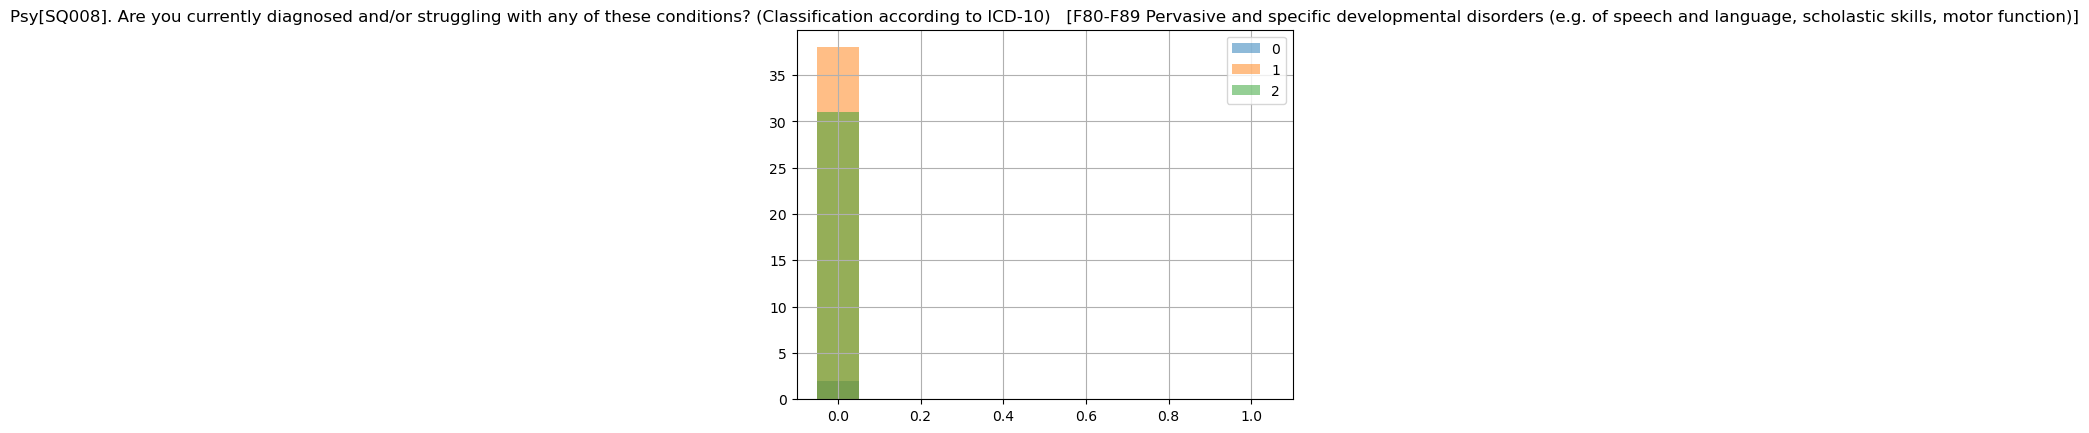

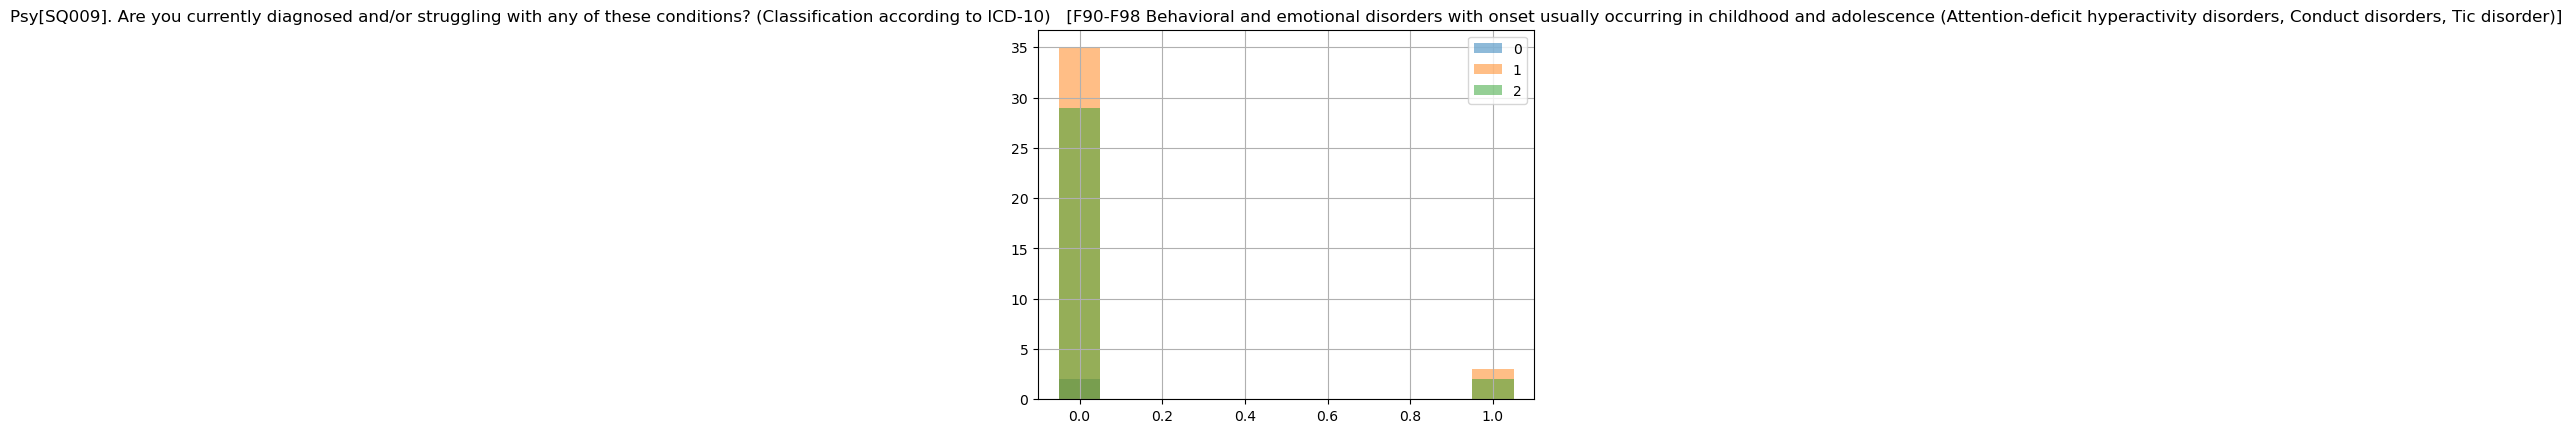

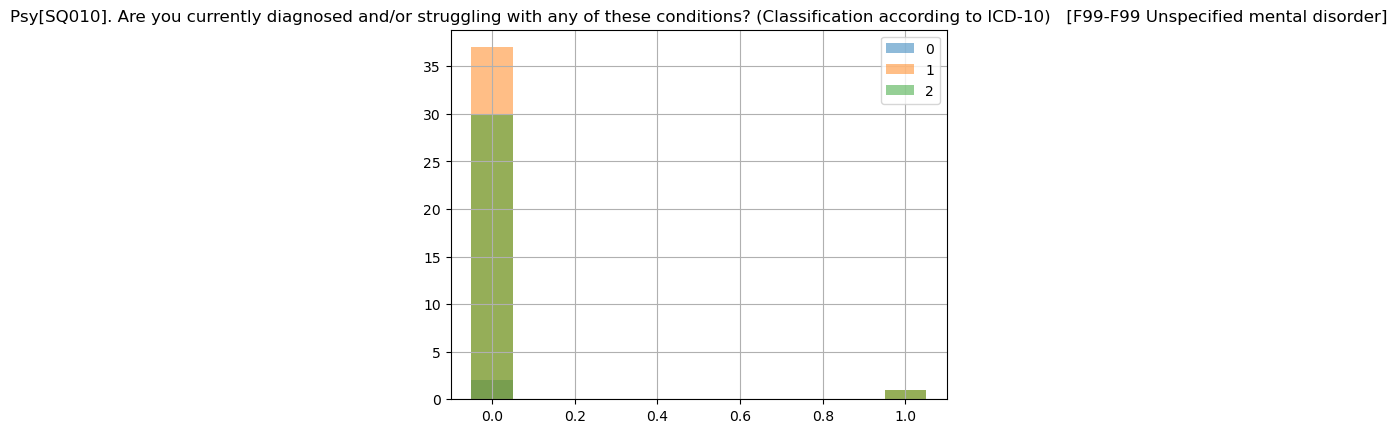

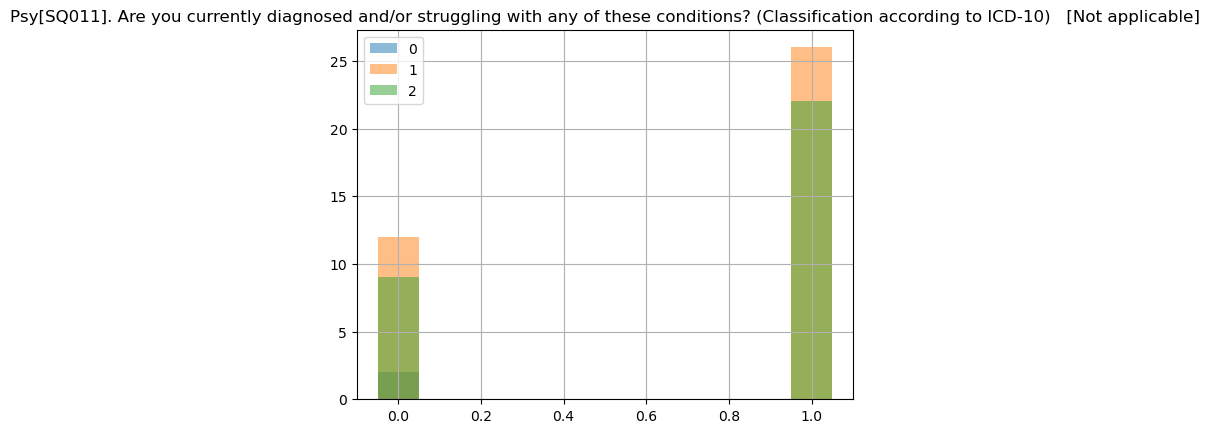

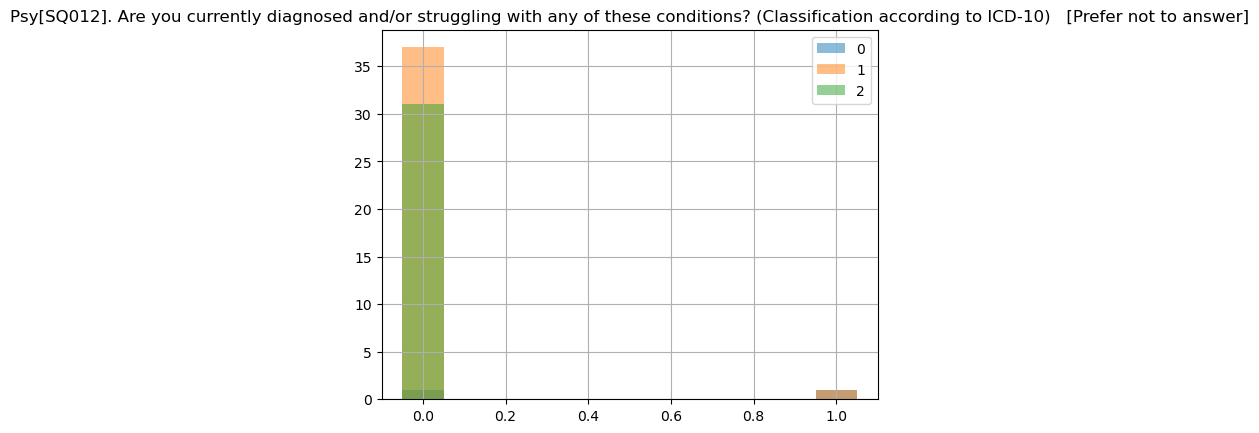

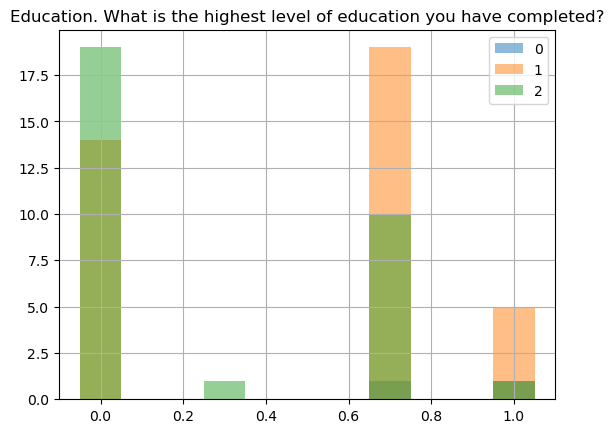

In [118]:
def social_hist(keys, answers, labels):
    uniques=set(labels)
    for key in keys:
        for label in np.arange(len(uniques)):
            group=answers[label==labels]
            group[key].hist(bins=np.arange(12)/10-0.05, label=label, alpha=0.5, align="mid")
        plt.title(key)
        plt.legend()
        ax=plt.gca()
        ax.set_xlim((-0.1, 1.1))
        plt.show()

dims=1
k=3

components=pca_np(not_social_data.T)

pca_transformed_data = components.T @ not_social_data

log, labels=kmeans(pca_transformed_data.iloc[:,:dims], k, 1)

social_hist(keys, df_imputed, labels)

Using n_PCs=3 and dims=3  resulted in three drastically different sized classes, with class 0 containing only one person. (Honestly, for me things are starting to get really creepy when it comes to interpreting data about specific people. They should stay anonymous, but at some point it seems rather easy to recreate who did the answers, for people who know both them and the data...) We dismiss this class from further analysis.

A potentially interesting observation is, that none of the 6 (7 with the dropped class) non-binary participants ended up in class 1. This could still be a random artifact due to the relatively low sample size and some cherry picking of emerged clusters. On the other hand it could be a hint, that the "there is no significant difference observed between the responses of binary and non-binary individuals" finding is not the whole story and that in fact there is a notable difference between non-binary and binary people with respect to how they answer happyness related questions. (Just to be clear, I'm pretty sure that this is rather to society treating non-binary people differnetly and them adapting accordingly. But any interpretation of mine is purely speculative.)

Additionally, group 1 seems to have slightly higher income, than the others. However, this difference is due to three people, only.

Some follow up analysis could include evaluating if groups that contain all of the non-binary participants are emerging with some consistency.

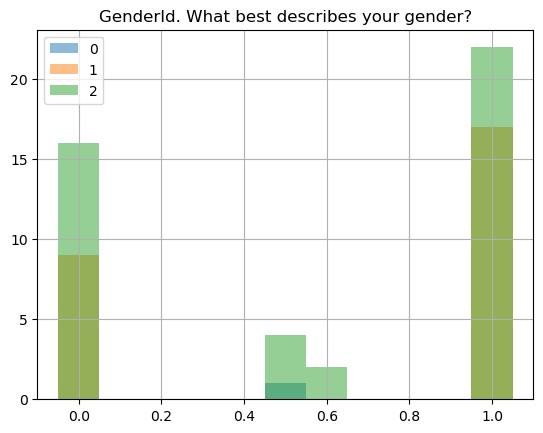

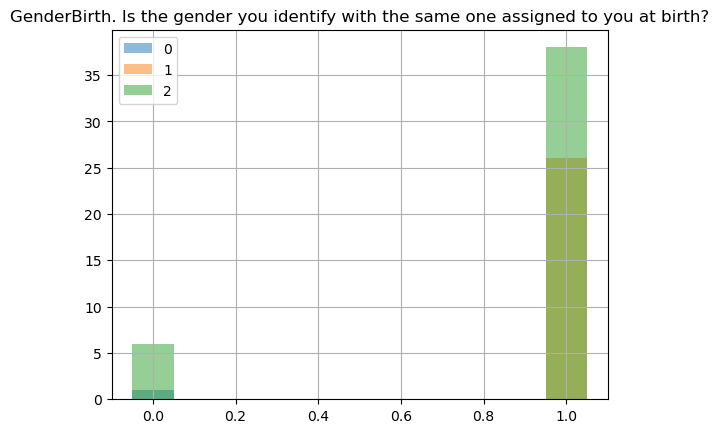

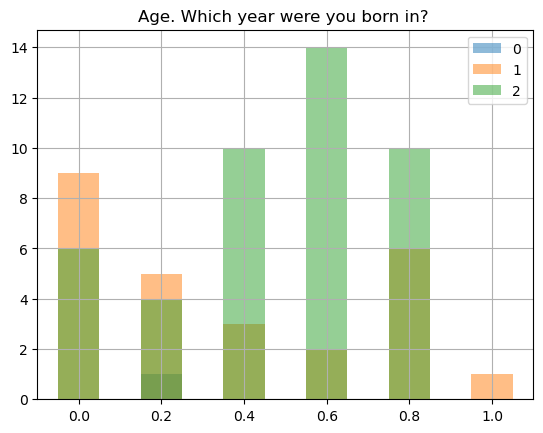

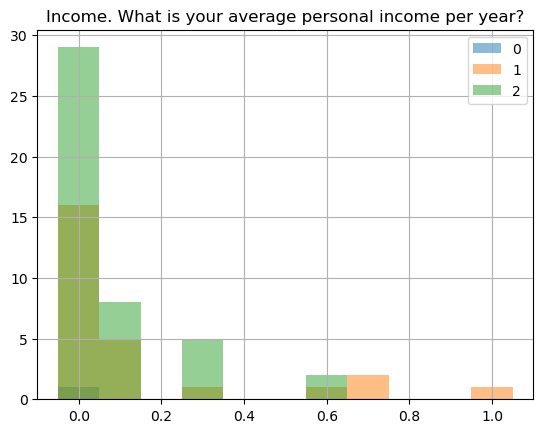

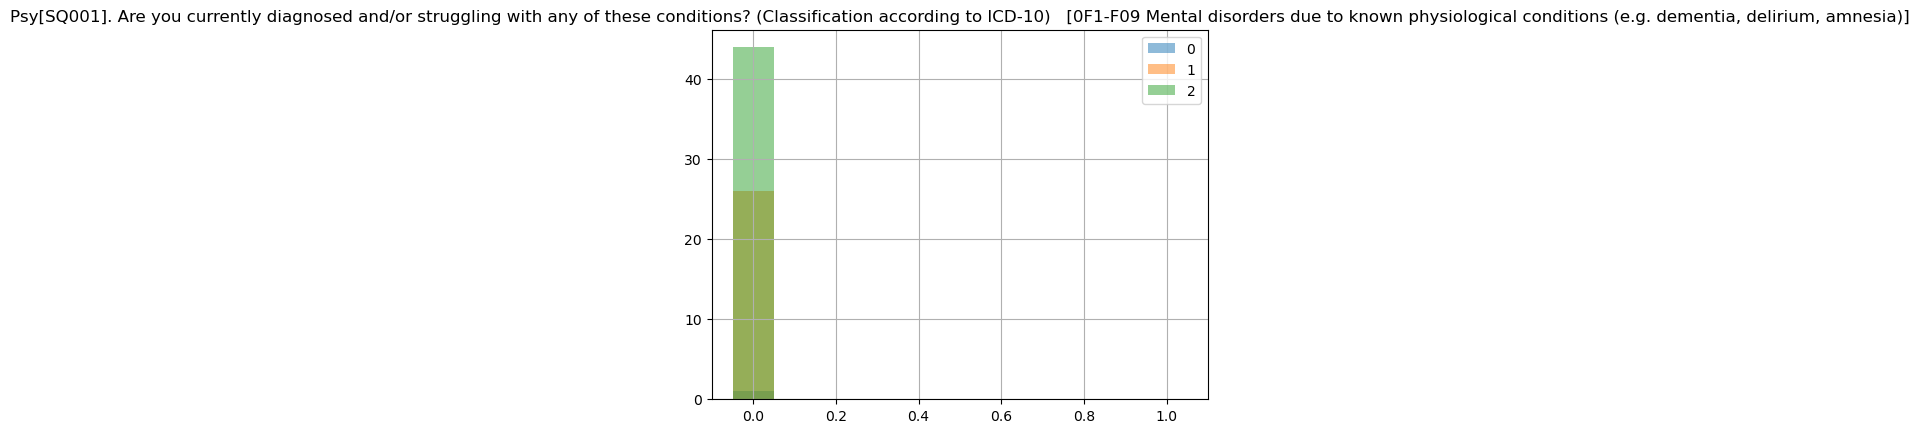

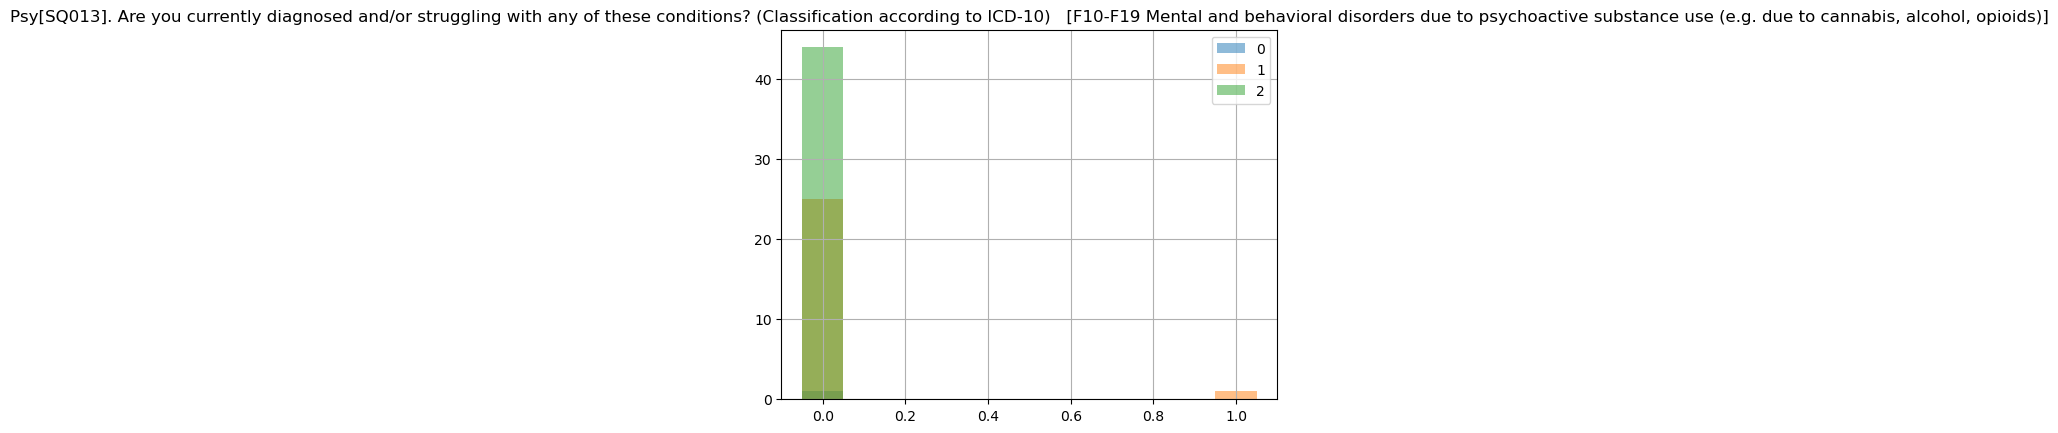

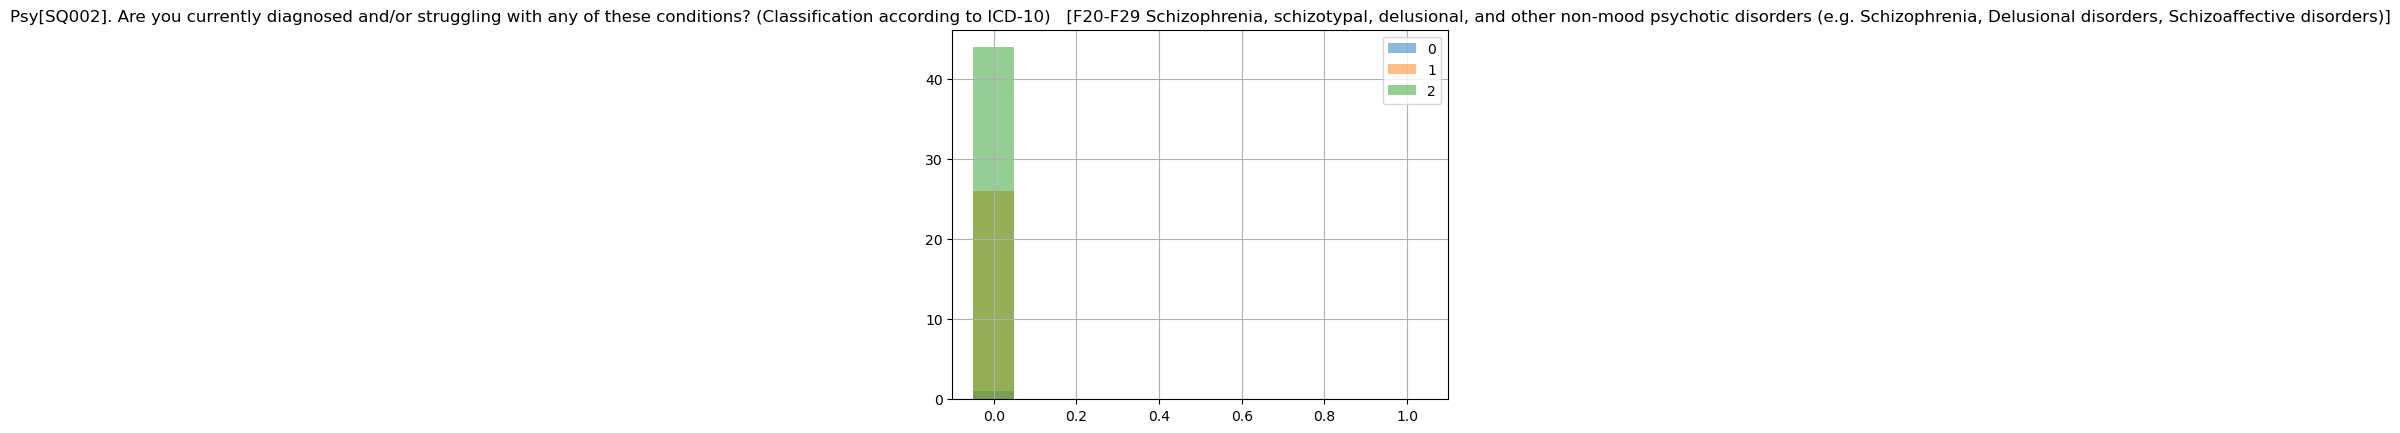

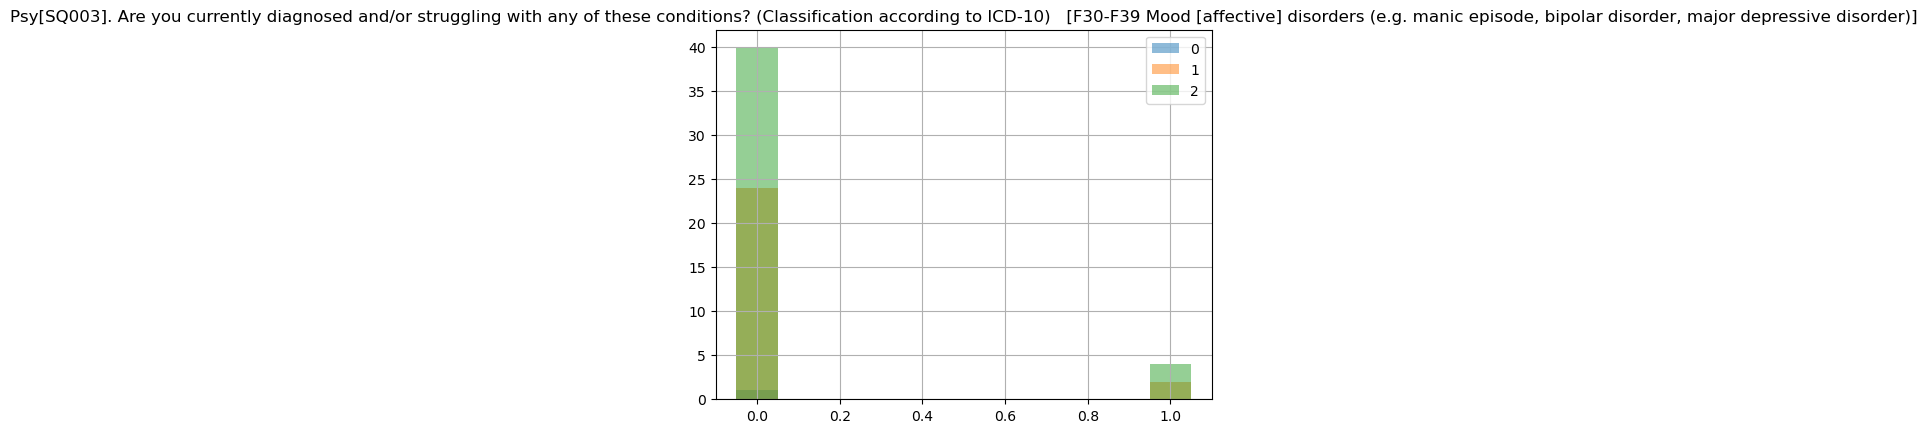

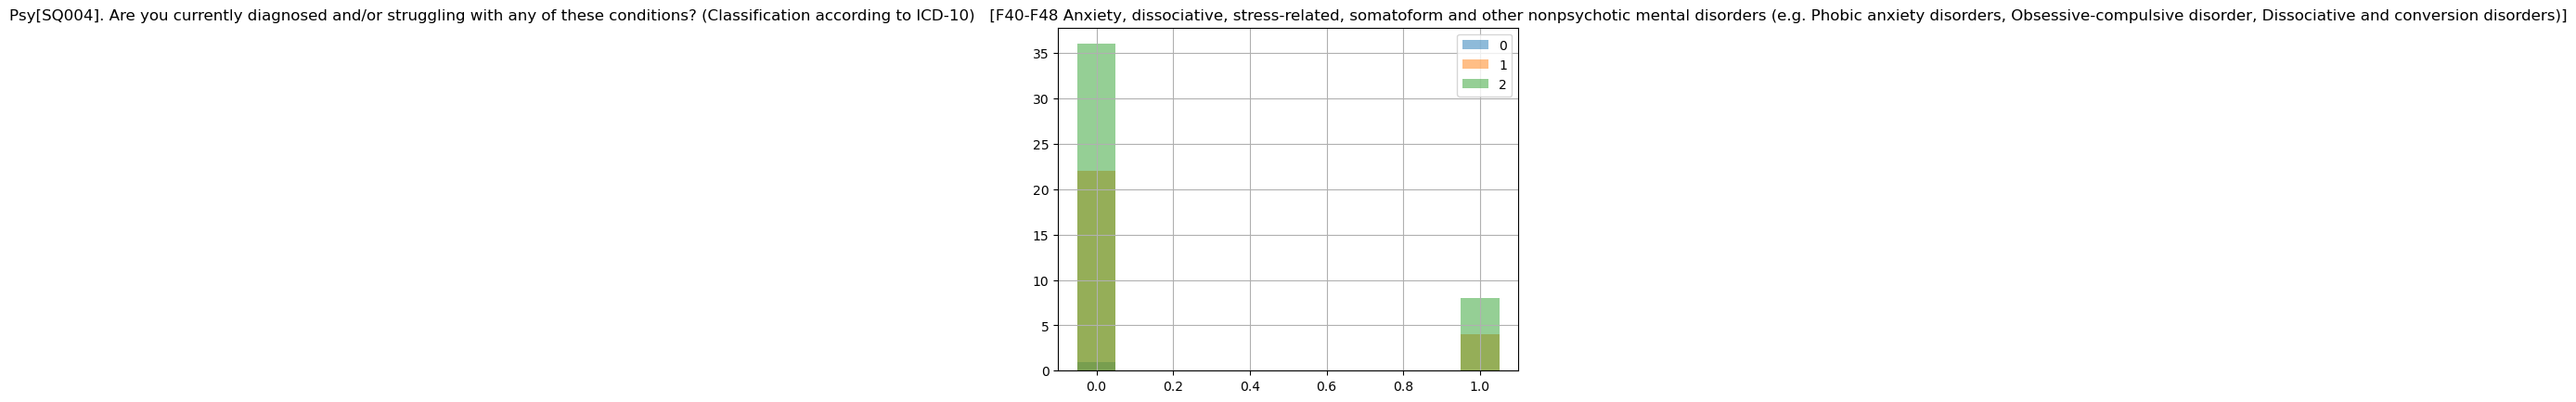

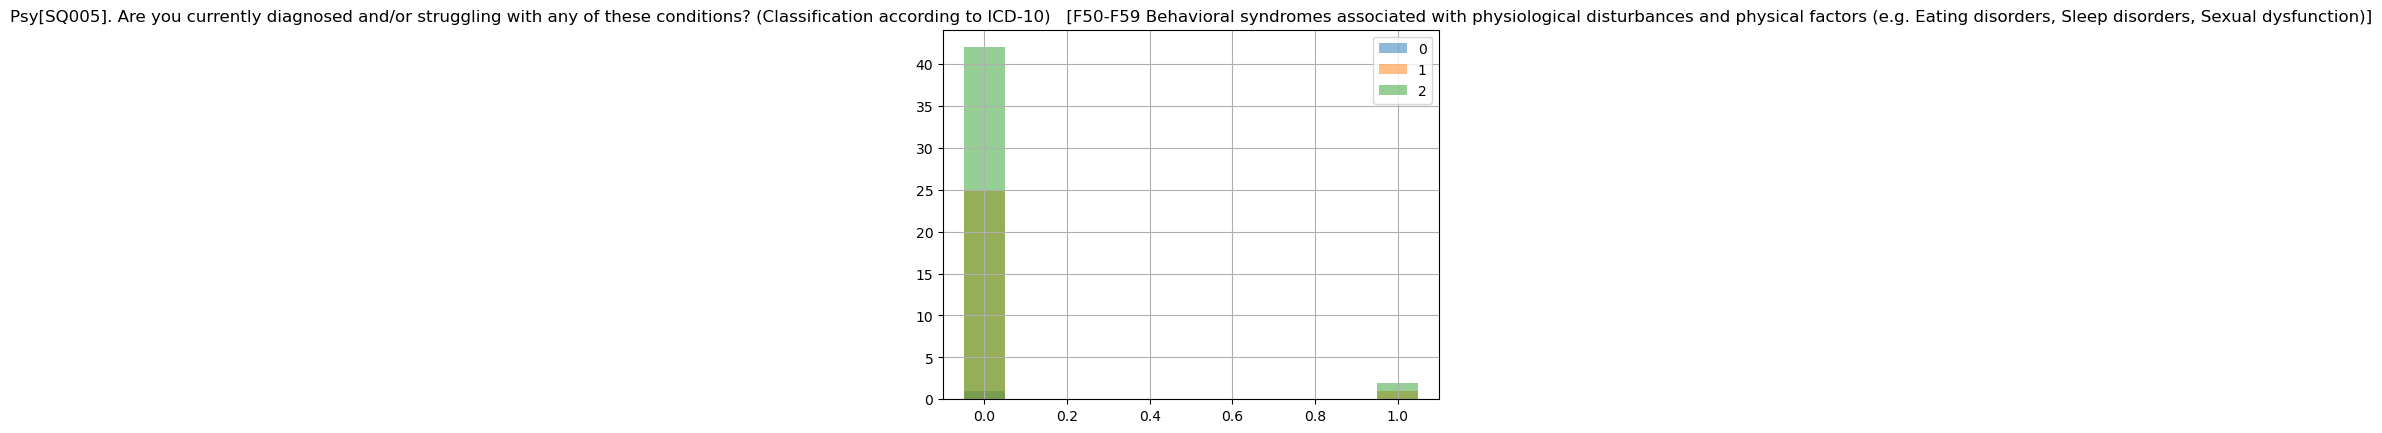

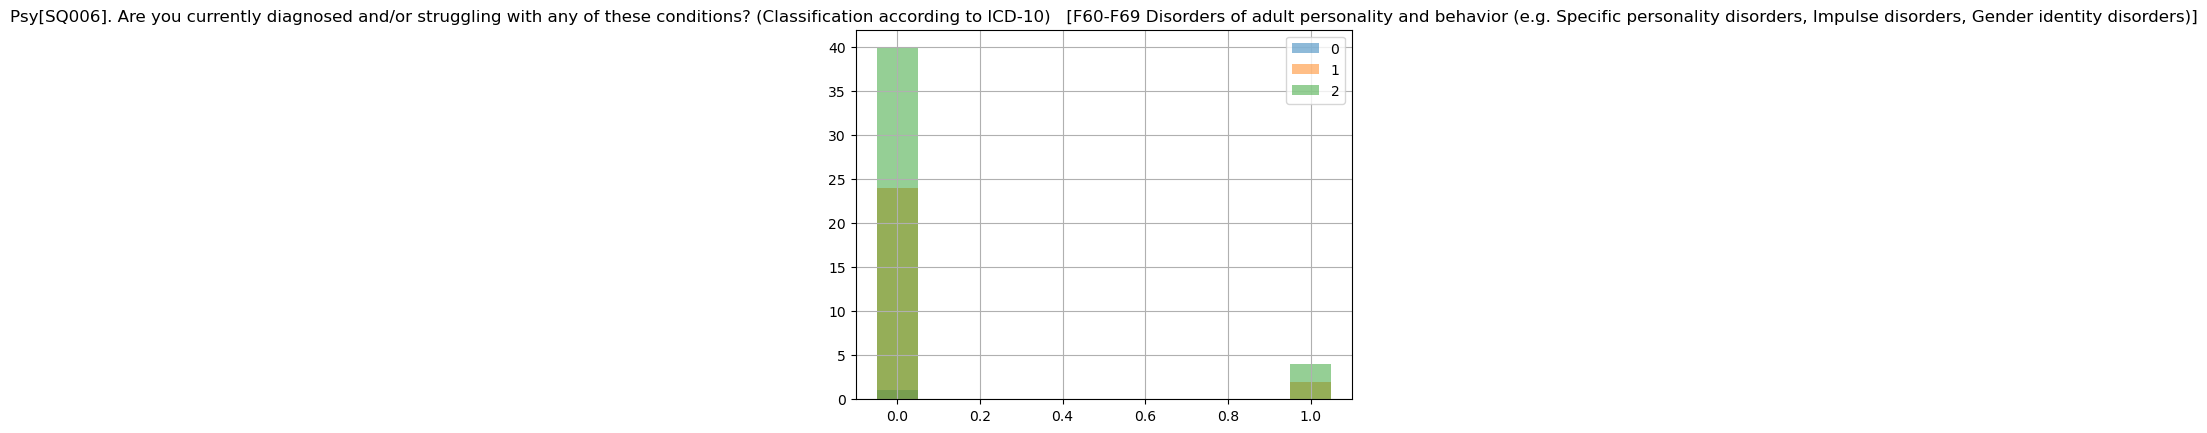

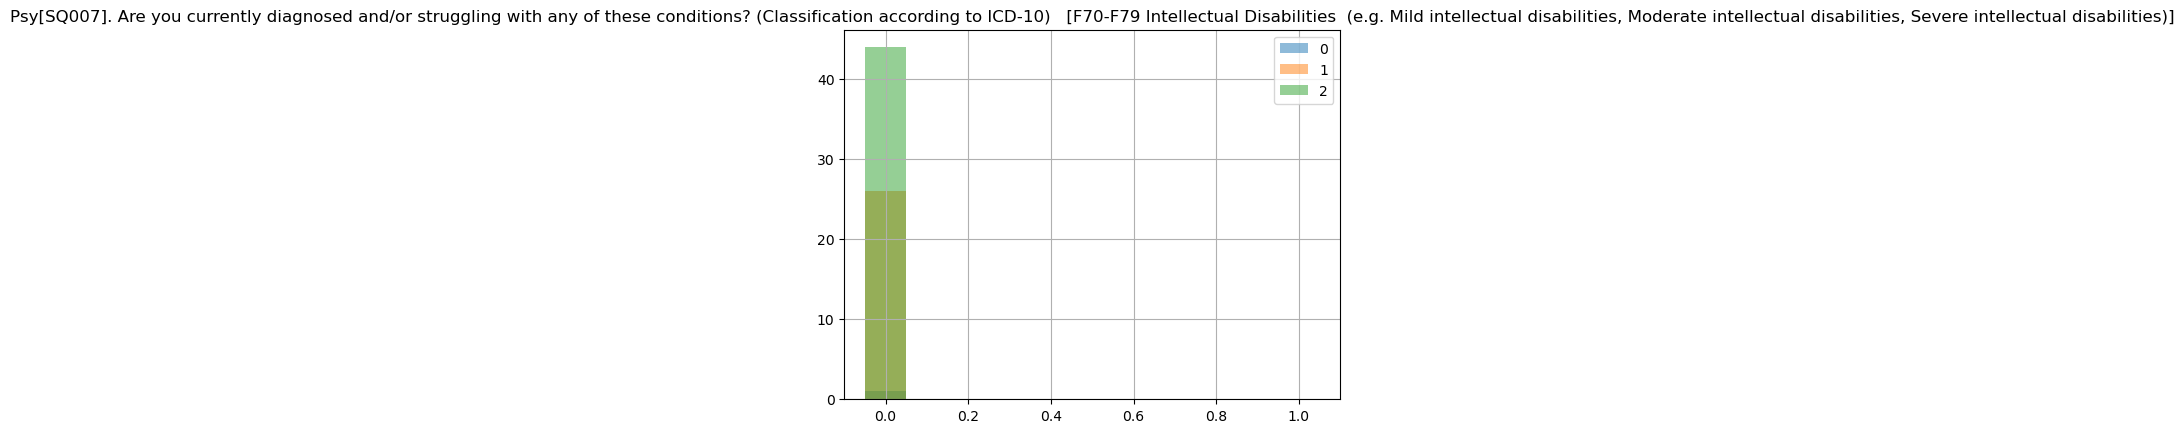

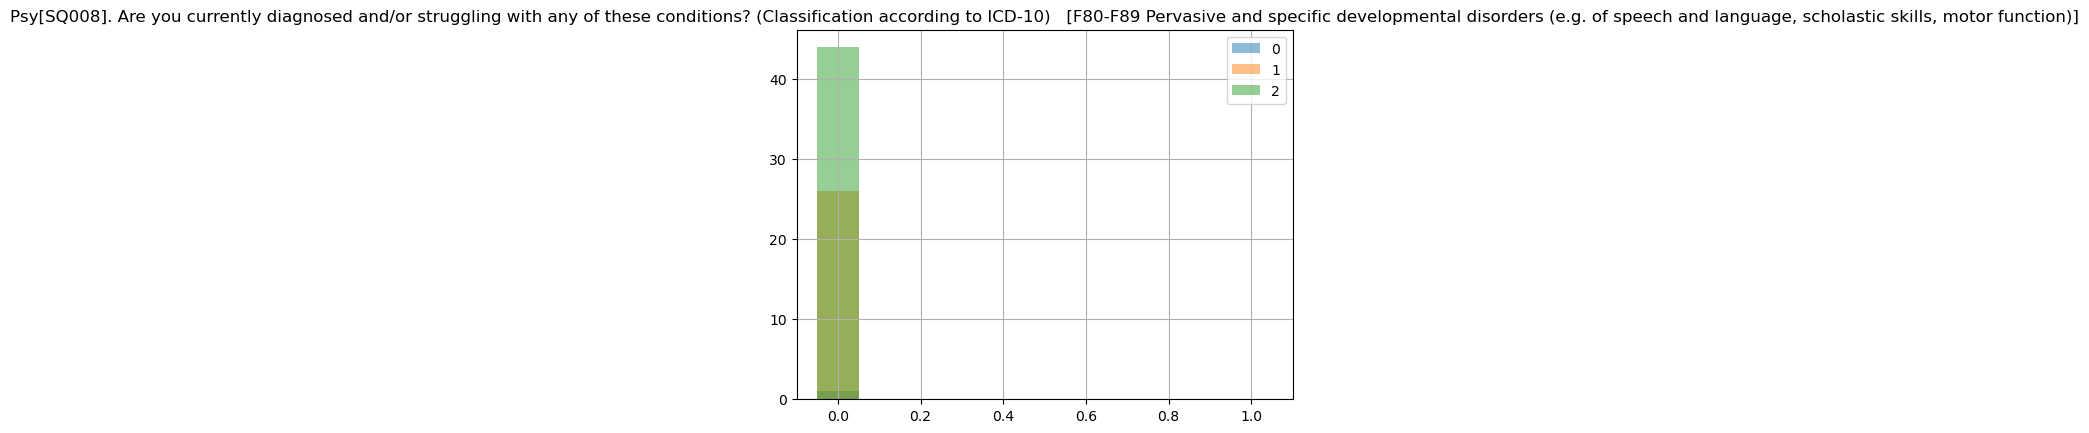

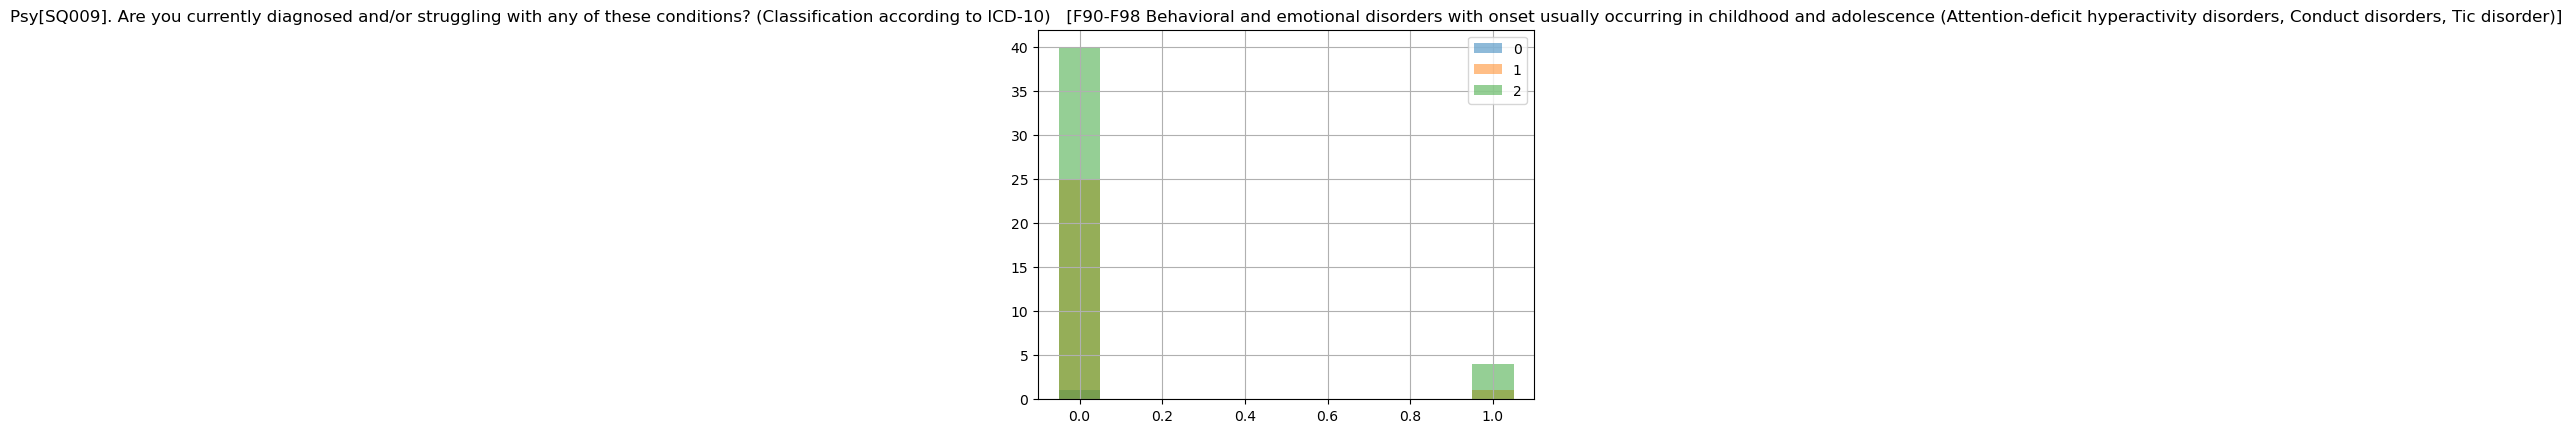

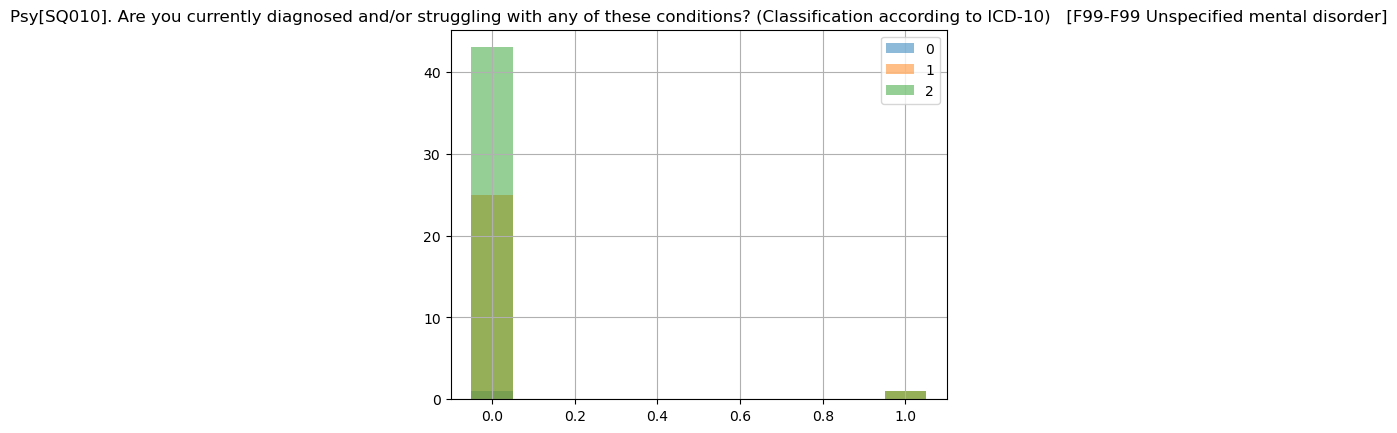

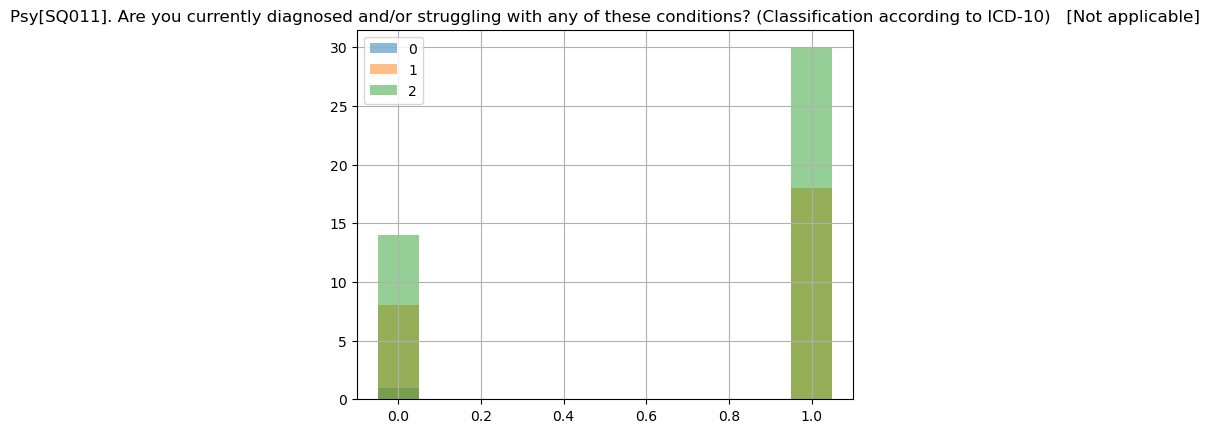

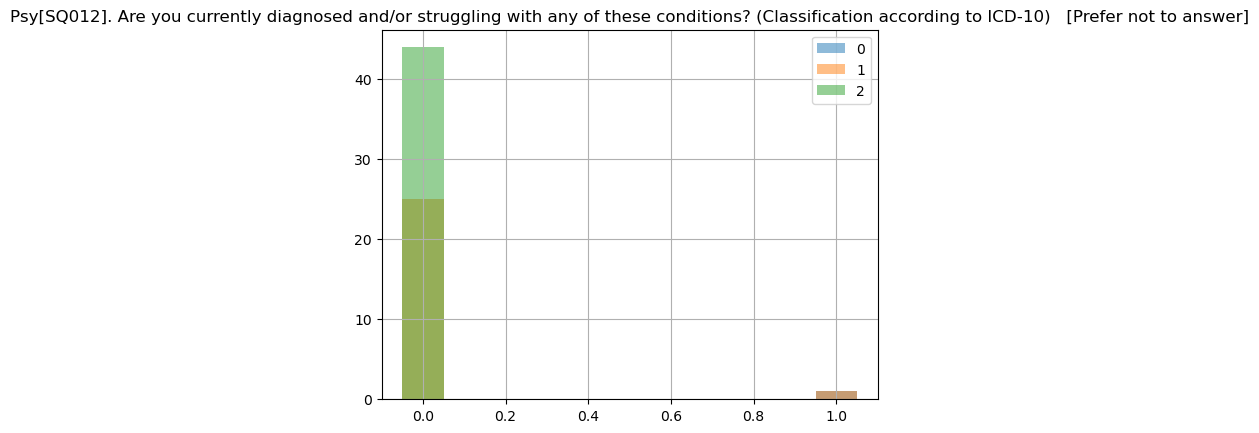

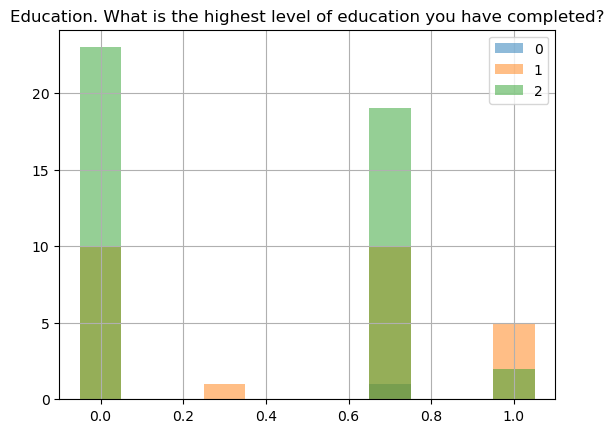

In [200]:
dims=3
k=3

components=pca_np(not_social_data.T)

pca_transformed_data = components.T @ not_social_data

log, labels=kmeans(pca_transformed_data.iloc[:,:dims], k, 1)

social_hist(keys, df_imputed, labels)

### Old stuff

(71, 71)
(71, 122)


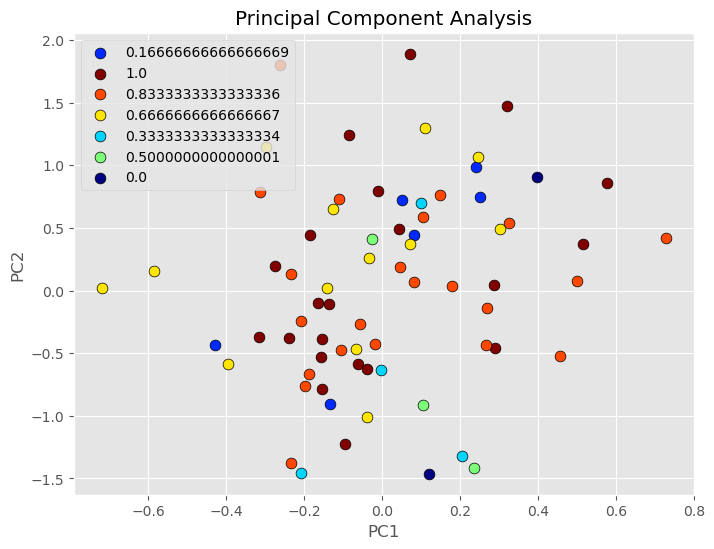

In [190]:
# still dunno what the labels are

pca = PCA().fit(df_imputed.T)

print(pca.components_.shape)
print(df_imputed.shape)
# Transform on the scaled features
pca_transformed_data1 = pca.components_.T @ df_imputed#pca.fit_transform(df_imputed)

pca_transformed_data2 = (df_imputed.T@pca.components_).T#pca.fit_transform(df_imputed)

# Define the labels for the plot legend
#labplot = []
lab = df.values[:,1] 

# Scatter plot for two principal components
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,6))
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [principalComponents.iloc[j,0] for j in range(len(principalComponents.iloc[:,0])) if lab[j] == u]
        yi = [principalComponents.iloc[j,1] for j in range(len(principalComponents.iloc[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    #plt.legend(labplot,loc='upper right')
    plt.title('Principal Component Analysis')
    plt.legend()
    plt.show()